# About the Dataset

This dataset consisits of 64x64 images captured by Sentinel-2A satellite and it has over 27000 images spread across 10 classes. The data consists of hyperspectral images with 13 spectral bands. 

The dataset is omposed of images taken from the Sentinel-2 satellite. It lists images of the earth's surface into 10 different land cover labels. 

In [1]:
# Importing libraries
import os
import shutil
import random
from tqdm import tqdm

import numpy as np
import pandas as pd

import PIL
import rasterio
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = "./tif"
labels = os.listdir(dataset)
labels

['AnnualCrop',
 'AnnualCrop.rar',
 'Forest',
 'Forest.rar',
 'HerbaceousVegetation',
 'HerbaceousVegetation.rar',
 'Highway',
 'Highway.rar',
 'Industrial',
 'Industrial.rar',
 'Pasture',
 'Pasture.rar',
 'PermanentCrop',
 'PermanentCrop.rar',
 'Residential',
 'Residential.rar',
 'River',
 'River.rar',
 'SeaLake',
 'SeaLake.rar']

These are the 10 classes of land cover in the dataset

# Data Exploration

### Plotting class distributions of dataset

Text(0.5, 1.0, 'EUROSAT Class Distribution')

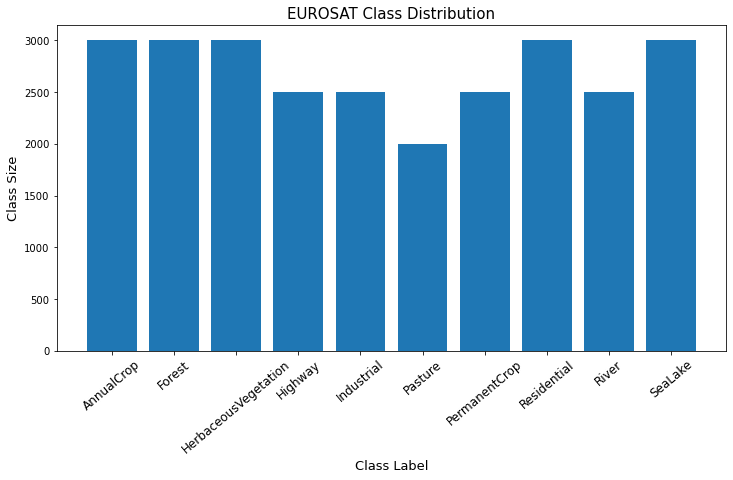

In [3]:
counts = {}

for l in labels:
    counts[l] = len(os.listdir(os.path.join(dataset, l)))

plt.figure(figsize=(12,6))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=40)
plt.xlabel('Class Label', fontsize=13)
plt.ylabel('Class Size', fontsize=13)
plt.title('EUROSAT Class Distribution', fontsize=15)

Each class varifies in size. Hence, we will have to stratify later on

## Preview of Different Classes

In [4]:
# Importing Images
# img_paths = [os.path.join(dataset, l, l+'_1000.tif') for l in labels]
img_paths = []

img_paths = img_paths + [os.path.join(dataset, l, l+'_2000.tif') for l in labels]


#### Calculating the dimensions of the image on earth in metres

In [5]:
for img in img_paths:
    sat_data = rasterio.open(img)
    width_in_projected_units = sat_data.bounds.right - sat_data.bounds.left
    height_in_projected_units = sat_data.bounds.top - sat_data.bounds.bottom
    print(img.split('\\')[-2], "\nWidth : ", width_in_projected_units, "Height : ", height_in_projected_units)

AnnualCrop 
Width :  640.178719083895 Height :  640.2759043509141
Forest 
Width :  639.931708357064 Height :  639.8996918257326
HerbaceousVegetation 
Width :  640.1186183239333 Height :  639.6750785252079
Highway 
Width :  642.439800421067 Height :  638.7684292686172
Industrial 
Width :  637.2012490322813 Height :  639.8486484214664
Pasture 
Width :  638.5759798452491 Height :  639.6489530131221
PermanentCrop 
Width :  639.5867255999474 Height :  641.1948298038915
Residential 
Width :  641.5660224460298 Height :  639.5868128668517
River 
Width :  639.8023213049164 Height :  640.2042276095599
SeaLake 
Width :  639.8546920991503 Height :  639.8149254219607


#### Rows & Columns

In [6]:
for img in img_paths:
    sat_data = rasterio.open(img)
    print(img.split('\\')[-2])
    print("Rows: {}, Columns: {}".format(sat_data.height, sat_data.width))

AnnualCrop
Rows: 64, Columns: 64
Forest
Rows: 64, Columns: 64
HerbaceousVegetation
Rows: 64, Columns: 64
Highway
Rows: 64, Columns: 64
Industrial
Rows: 64, Columns: 64
Pasture
Rows: 64, Columns: 64
PermanentCrop
Rows: 64, Columns: 64
Residential
Rows: 64, Columns: 64
River
Rows: 64, Columns: 64
SeaLake
Rows: 64, Columns: 64


#### Converting the pixel co-ordinates to longitudes and latitudes

In [7]:
for img in img_paths:
    sat_data = rasterio.open(img)
    print(img.split('\\')[-2])
    # Upper left pixel
    row_min = 0
    col_min = 0

    # Lower right pixel.  Rows and columns are zero indexing.
    row_max = sat_data.height - 1
    col_max = sat_data.width - 1

    # Transform coordinates with the dataset's affine transformation.
    topleft = sat_data.transform * (row_min, col_min)
    botright = sat_data.transform * (row_max, col_max)

    print("Top left corner coordinates: {}".format(topleft))
    print("Bottom right corner coordinates: {}\n".format(botright))

AnnualCrop
Top left corner coordinates: (772967.6388936953, 5217495.586391792)
Bottom right corner coordinates: (773597.8148202935, 5216865.314798446)

Forest
Top left corner coordinates: (576998.316997501, 5614336.0874284245)
Bottom right corner coordinates: (577628.2497729149, 5613706.186169283)

HerbaceousVegetation
Top left corner coordinates: (453874.8038349409, 6139459.5803086115)
Bottom right corner coordinates: (454504.9205998535, 6138829.900153189)

Highway
Top left corner coordinates: (461226.249066, 3100223.32396)
Bottom right corner coordinates: (461858.65074453945, 3099594.536287439)

Industrial
Top left corner coordinates: (566906.655159, 5643228.87607)
Bottom right corner coordinates: (567533.9001385161, 5642599.0250567105)

Pasture
Top left corner coordinates: (577529.8024485304, 5861928.808272096)
Bottom right corner coordinates: (578158.4006786906, 5861299.153833974)

PermanentCrop
Top left corner coordinates: (653386.5139481875, 4869515.055420981)
Bottom right corner

#### Bands

The images that we are inspecting have 13 spectral bands. Each spectral band is stored as a numpy array

In [8]:
for img in img_paths:
    sat_data = rasterio.open(img)
    print(img.split('\\')[-2])
    print(sat_data.count)

    # sequence of band indexes
    print(sat_data.indexes, "\n")


AnnualCrop
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

Forest
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

HerbaceousVegetation
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

Highway
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

Industrial
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

Pasture
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

PermanentCrop
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

Residential
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

River
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 

SeaLake
13
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13) 



### Visualizing the Images

We are using matplotlib to visualise the image since it essentially consists of arrays.

#### About the Bands

B1  - Ultra Blue (Coastal and Aerosol) 60m 443nm

B2  - Blue                             10m 490nm

B3  - Green                            10m 560nm

B4  - Red                              10m 665nm

B5  - VNIR                             20m 705nm

B6  - VNIR                             20m 740nm

B7  - VNIR                             20m 783nm

B8  - VNIR                             10m 842nm

B8a - VNIR                             10m 865nm

B9  - SWIR                             60m 940nm

B10 - SWIR                             60m 1375nm

B11 - SWIR                             20m 1610nm

B12 - SWIR                             20m 2190nm

#### Band Combinations
1. Natural Color - B4, B3, B2
2. Color Infrared - B8, B4, B3
3. Short-Wave Infrared - B12, B8A, B4
4. Agriculture - B11, B8, B2
5. Geology - B12, B11, B2
6. Bathymetric - B4, B3, B1
7. Normalized Difference Vegetation Index - (B8-B4)/(B8+B4)
8. Moisture Index (B8A-B11)/(B8A+B11)

**We are going to use Normalised Difference Vegetation Index (NDVI) in classfication.** Hence, we have visualised only the B8 and B4 bands. 

B8 is the *near-infrared (NIR)* band and B4 is the *red* band.

#### Displaying the Red Band

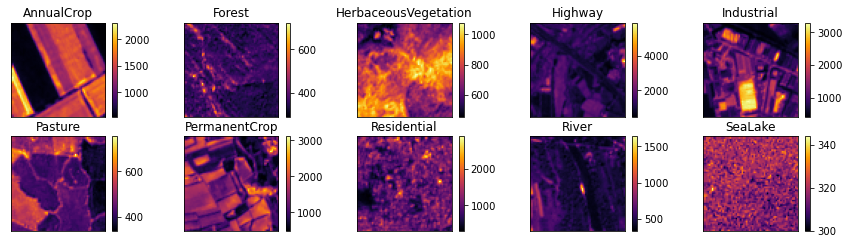

In [9]:
plt.figure(figsize=(15,8))
for i in range(len(img_paths)):
    plt.subplot(4, 5, i+1, xticks=[], yticks=[])
    img = rasterio.open(img_paths[i]).read()[3]
    fig = plt.imshow(img)
    fig.set_cmap('inferno')
    plt.title(img_paths[i].split('\\')[-2])
    plt.colorbar()
# plt.show()

#### Displaying the Near-Infrared Band

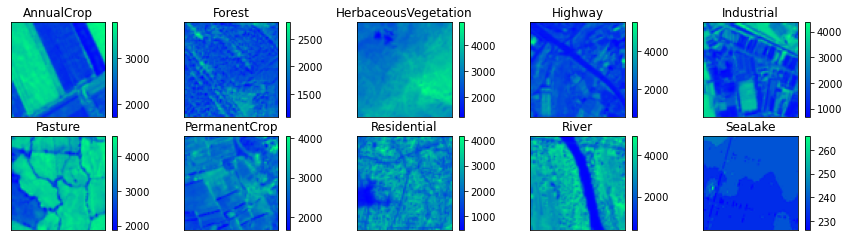

In [10]:
plt.figure(figsize=(15,8))
for i in range(len(img_paths)):
    plt.subplot(4, 5, i+1, xticks=[], yticks=[])
    img = rasterio.open(img_paths[i]).read()[7]
    fig = plt.imshow(img)
    fig.set_cmap('winter')
    plt.title(img_paths[i].split('\\')[-2])
    plt.colorbar()

## Calculating NDVI

NDVI = (NIR - RED)/(NIR + RED)


In [3]:
def cal_ndvi(sat_data):
    r = sat_data.read(3)
    nir = sat_data.read(7)
    
    # calculating denominator i.e. NIR + RED
    denom = np.add(nir, r)
    
    # calculating numerator i.e. NIR - RED
    numerator = np.subtract(nir, r)
    
    return np.divide(numerator, denom)

# l = cal_ndvi(rasterio.open(img_paths[0]))

In [34]:
print(l.min(), l.max(), l.shape )
meta = rasterio.open(img_paths[0]).meta
meta

0.24075799937868902 0.669609079445145 (64, 64)


{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 64,
 'height': 64,
 'count': 13,
 'crs': CRS.from_epsg(32633),
 'transform': Affine(10.002792485685141, 0.0, 772967.6388936953,
        0.0, -10.004311005484443, 5217495.586391792)}

### Visualizing NDVI for different classes

AnnualCrop : min0.24075799937868902, max0.669609079445145, meta : {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 64, 'height': 64, 'count': 13, 'crs': CRS.from_epsg(32633), 'transform': Affine(10.002792485685141, 0.0, 772967.6388936953,
       0.0, -10.004311005484443, 5217495.586391792)}
Forest : min0.35356089338390223, max0.5901408450704225, meta : {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 64, 'height': 64, 'count': 13, 'crs': CRS.from_epsg(32634), 'transform': Affine(9.99893294307967, 0.0, 576998.316997501,
       0.0, -9.998432684782893, 5614336.0874284245)}
HerbaceousVegetation : min0.3162393162393162, max0.6640059402264711, meta : {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 64, 'height': 64, 'count': 13, 'crs': CRS.from_epsg(32630), 'transform': Affine(10.001853411311028, 0.0, 453874.8038349409,
       0.0, -9.994923101952239, 6139459.5803086115)}
Highway : min0.0, max31.931773879142302, meta : {'driver': 'GTiff', 'dtype'

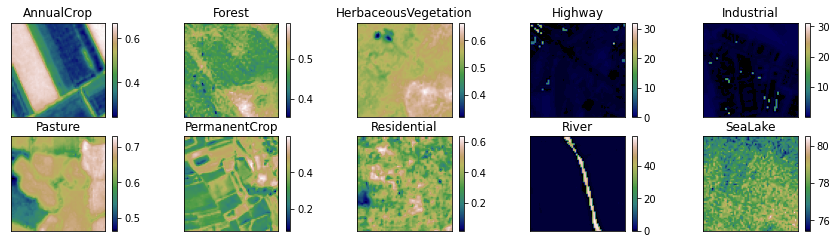

In [25]:
plt.figure(figsize=(15,8))
for i in range(len(img_paths)):
    plt.subplot(4, 5, i+1, xticks=[], yticks=[])
    img = rasterio.open(img_paths[i])
    ndvi = cal_ndvi(img)
    print("{} : min{}, max{}, meta : {}".format(img_paths[i].split('\\')[-2], ndvi.min(), ndvi.max(), img.meta))
    fig = plt.imshow(ndvi)
    fig.set_cmap('gist_earth')
    plt.title(img_paths[i].split('\\')[-2])
    plt.colorbar()

**What the values of NDVI indicate?**
1. <=0.1 : Areas of barren rock, sand or snow i.e. negligible vegetation
2. 0.2 to 0.5 : Sparse Vegetation such as shrubs and grasslands or senescing crops
3. 0.6 to 0.9 : Dense Vegetation (temperate and tropical forests or crops at their peak growth stage)

# Data Preprocessing

We have performed a stratified shuffle-split using Scikit-learn to maintain class proportions. 30% of the dataset will be held for evaluation purposes. We will be loading my data into the Keras model using the ImageDataGenerator class. We will need the images to be in their own respective land cover directories.

The images stored for testing and training will be NVDI values.

In [4]:
# importing libraries
import re
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
TRAIN_DIR = './model_sets/training'
TEST_DIR = './model_sets/testing'
BATCH_SIZE = 64
NUM_CLASSES=len(labels)
INPUT_SHAPE = (64, 64, 1)
CLASS_MODE = 'categorical'

In [52]:
# create training and testing directories
for path in (TRAIN_DIR, TEST_DIR):
    if not os.path.exists(path):
        os.mkdir(path)

In [53]:
# create class label subdirectories in train and test
for l in labels:
    
    if not os.path.exists(os.path.join(TRAIN_DIR, l)):
        os.mkdir(os.path.join(TRAIN_DIR, l))

    if not os.path.exists(os.path.join(TEST_DIR, l)):
        os.mkdir(os.path.join(TEST_DIR, l))

In [54]:
# map each image path to their class label in 'data'
data = {}

for l in labels:
    for img in os.listdir(dataset+'/'+l):
        data.update({os.path.join(dataset, l, img): l})

X = pd.Series(list(data.keys()))
y = pd.get_dummies(pd.Series(data.values()))

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=69)

In [55]:
split

StratifiedShuffleSplit(n_splits=1, random_state=69, test_size=0.2,
            train_size=None)

In [56]:
# split the list of image paths
for train_idx, test_idx in split.split(X, y):
    #Train & test paths
    train_paths = X[train_idx]
    test_paths = X[test_idx]
    
    for i in train_paths:
        print(i)
        # Calculating NDVI
        img = rasterio.open(i)
        if(img.count == 13) :
            ndvi_values = cal_ndvi(img)
            meta = img.meta

            # get the dtype of our NDVI array:
            ndvi_dtype = ndvi_values.dtype

            kwargs = meta
            kwargs.update(dtype=ndvi_dtype)
            kwargs.update(count = 1) # No longer 13-band image

            new_path = re.sub('./tif', './model_sets/training', i)
#             new_path = re.sub('.tif', '.jpeg', new_path)
#             print(new_path)
            with rasterio.open(new_path, 'w', **kwargs) as dst:
                dst.write(ndvi_values, 1)
        
    for i in test_paths:
        print(i)
        # Calculating NDVI
        img = rasterio.open(i)
        if(img.count == 13) :
            ndvi_values = cal_ndvi(img)
            meta = img.meta

            # get the dtype of our NDVI array:
            ndvi_dtype = ndvi_values.dtype

            kwargs = meta
            kwargs.update(dtype=ndvi_dtype)
            kwargs.update(count = 1) # No longer 13-band image

            new_path = re.sub('./tif', './model_sets/testing', i)
#             new_path = re.sub('.tif', '.jpeg', new_path)
#             print(new_path)
            with rasterio.open(new_path, 'w', **kwargs) as dst:
                dst.write(ndvi_values, 1)

./tif\River\River_820.tif
./tif\Pasture\Pasture_1658.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2093.tif
./tif\AnnualCrop\AnnualCrop_102.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_38.tif
./tif\Residential\Residential_2119.tif
./tif\SeaLake\SeaLake_304.tif
./tif\Forest\Forest_1622.tif
./tif\River\River_2230.tif
./tif\Highway\Highway_2365.tif
./tif\AnnualCrop\AnnualCrop_371.tif
./tif\AnnualCrop\AnnualCrop_910.tif
./tif\PermanentCrop\PermanentCrop_1738.tif
./tif\Pasture\Pasture_375.tif
./tif\Residential\Residential_781.tif
./tif\Forest\Forest_579.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_276.tif
./tif\PermanentCrop\PermanentCrop_691.tif
./tif\Forest\Forest_1437.tif
./tif\River\River_2487.tif
./tif\AnnualCrop\AnnualCrop_1308.tif
./tif\PermanentCrop\PermanentCrop_1787.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_75.tif
./tif\Forest\Forest_2528.tif
./tif\River\River_1664.tif
./tif\River\River_2439.tif
./tif\Highway\Highway_577.tif
./tif\Industrial\Industria

./tif\River\River_389.tif
./tif\River\River_2385.tif
./tif\PermanentCrop\PermanentCrop_2289.tif
./tif\Residential\Residential_1065.tif
./tif\River\River_2318.tif
./tif\Highway\Highway_703.tif
./tif\Pasture\Pasture_1110.tif
./tif\Pasture\Pasture_986.tif
./tif\River\River_903.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2898.tif
./tif\SeaLake\SeaLake_197.tif
./tif\Forest\Forest_1883.tif
./tif\PermanentCrop\PermanentCrop_79.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_297.tif
./tif\Forest\Forest_2661.tif
./tif\SeaLake\SeaLake_2920.tif
./tif\River\River_2042.tif
./tif\SeaLake\SeaLake_1432.tif
./tif\Pasture\Pasture_799.tif
./tif\Pasture\Pasture_475.tif
./tif\River\River_383.tif
./tif\Residential\Residential_630.tif
./tif\AnnualCrop\AnnualCrop_1044.tif
./tif\SeaLake\SeaLake_2207.tif
./tif\Forest\Forest_1145.tif
./tif\Industrial\Industrial_1081.tif
./tif\AnnualCrop\AnnualCrop_649.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2909.tif
./tif\HerbaceousVegetation\HerbaceousVe

./tif\AnnualCrop\AnnualCrop_1093.tif
./tif\SeaLake\SeaLake_558.tif
./tif\AnnualCrop\AnnualCrop_1190.tif
./tif\Residential\Residential_1300.tif
./tif\Residential\Residential_2389.tif
./tif\Residential\Residential_1957.tif
./tif\Pasture\Pasture_1320.tif
./tif\River\River_1639.tif
./tif\Industrial\Industrial_1973.tif
./tif\Industrial\Industrial_2126.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1234.tif
./tif\River\River_1540.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_468.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1711.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1559.tif
./tif\Highway\Highway_2339.tif
./tif\SeaLake\SeaLake_1919.tif
./tif\Pasture\Pasture_1925.tif
./tif\Residential\Residential_626.tif
./tif\SeaLake\SeaLake_2527.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_615.tif
./tif\SeaLake\SeaLake_532.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2790.tif
./tif\Pasture\Pasture_868.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1833.tif
.

./tif\SeaLake\SeaLake_855.tif
./tif\River\River_2236.tif
./tif\SeaLake\SeaLake_1076.tif
./tif\Forest\Forest_760.tif
./tif\AnnualCrop\AnnualCrop_610.tif
./tif\Pasture\Pasture_1720.tif
./tif\Forest\Forest_1053.tif
./tif\River\River_201.tif
./tif\Residential\Residential_708.tif
./tif\PermanentCrop\PermanentCrop_889.tif
./tif\Residential\Residential_2315.tif
./tif\Residential\Residential_388.tif
./tif\SeaLake\SeaLake_875.tif
./tif\AnnualCrop\AnnualCrop_887.tif
./tif\SeaLake\SeaLake_2763.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2061.tif
./tif\Pasture\Pasture_892.tif
./tif\Industrial\Industrial_1649.tif
./tif\Highway\Highway_626.tif
./tif\Highway\Highway_700.tif
./tif\Industrial\Industrial_684.tif
./tif\Industrial\Industrial_1835.tif
./tif\Highway\Highway_114.tif
./tif\Residential\Residential_23.tif
./tif\Pasture\Pasture_1953.tif
./tif\Forest\Forest_2754.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_528.tif
./tif\Forest\Forest_2399.tif
./tif\River\River_1648.tif
./tif\Reside

./tif\Forest\Forest_2832.tif
./tif\AnnualCrop\AnnualCrop_2117.tif
./tif\Forest\Forest_2410.tif
./tif\PermanentCrop\PermanentCrop_1510.tif
./tif\Forest\Forest_435.tif
./tif\SeaLake\SeaLake_917.tif
./tif\AnnualCrop\AnnualCrop_1627.tif
./tif\Forest\Forest_2956.tif
./tif\Industrial\Industrial_1336.tif
./tif\Industrial\Industrial_739.tif
./tif\Industrial\Industrial_2195.tif
./tif\River\River_1801.tif
./tif\Highway\Highway_1162.tif
./tif\AnnualCrop\AnnualCrop_461.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2654.tif
./tif\Residential\Residential_2309.tif
./tif\AnnualCrop\AnnualCrop_2203.tif
./tif\Industrial\Industrial_276.tif
./tif\Highway\Highway_548.tif
./tif\AnnualCrop\AnnualCrop_970.tif
./tif\Pasture\Pasture_769.tif
./tif\Pasture\Pasture_1807.tif
./tif\River\River_258.tif
./tif\PermanentCrop\PermanentCrop_1274.tif
./tif\SeaLake\SeaLake_1440.tif
./tif\Residential\Residential_628.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2527.tif
./tif\Residential\Residential_2447.tif
./ti

./tif\Forest\Forest_165.tif
./tif\Forest\Forest_1565.tif
./tif\SeaLake\SeaLake_589.tif
./tif\Residential\Residential_1722.tif
./tif\AnnualCrop\AnnualCrop_2152.tif
./tif\SeaLake\SeaLake_1870.tif
./tif\PermanentCrop\PermanentCrop_1585.tif
./tif\PermanentCrop\PermanentCrop_387.tif
./tif\AnnualCrop\AnnualCrop_688.tif
./tif\Residential\Residential_2067.tif
./tif\PermanentCrop\PermanentCrop_2110.tif
./tif\Industrial\Industrial_1785.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1233.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1359.tif
./tif\Highway\Highway_661.tif
./tif\PermanentCrop\PermanentCrop_2114.tif
./tif\Industrial\Industrial_458.tif
./tif\Residential\Residential_595.tif
./tif\Pasture\Pasture_1769.tif
./tif\AnnualCrop\AnnualCrop_2272.tif
./tif\Forest\Forest_2012.tif
./tif\Pasture\Pasture_1671.tif
./tif\River\River_574.tif
./tif\Highway\Highway_1082.tif
./tif\PermanentCrop\PermanentCrop_353.tif
./tif\Industrial\Industrial_906.tif
./tif\HerbaceousVegetation\HerbaceousVeget

./tif\Forest\Forest_2655.tif
./tif\PermanentCrop\PermanentCrop_283.tif
./tif\Industrial\Industrial_1070.tif
./tif\River\River_1406.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2574.tif
./tif\Residential\Residential_1322.tif
./tif\AnnualCrop\AnnualCrop_106.tif
./tif\Residential\Residential_1512.tif
./tif\Industrial\Industrial_2292.tif
./tif\River\River_1346.tif
./tif\River\River_30.tif
./tif\PermanentCrop\PermanentCrop_171.tif
./tif\Forest\Forest_2272.tif
./tif\Residential\Residential_919.tif
./tif\AnnualCrop\AnnualCrop_1042.tif
./tif\River\River_2002.tif
./tif\AnnualCrop\AnnualCrop_1507.tif
./tif\River\River_408.tif
./tif\PermanentCrop\PermanentCrop_1088.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1139.tif
./tif\River\River_1138.tif
./tif\Residential\Residential_1842.tif
./tif\Residential\Residential_204.tif
./tif\Forest\Forest_1427.tif
./tif\Pasture\Pasture_1466.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1690.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_

./tif\River\River_1311.tif
./tif\AnnualCrop\AnnualCrop_1260.tif
./tif\SeaLake\SeaLake_2924.tif
./tif\Industrial\Industrial_2269.tif
./tif\Pasture\Pasture_486.tif
./tif\Pasture\Pasture_1295.tif
./tif\Pasture\Pasture_623.tif
./tif\Highway\Highway_1385.tif
./tif\AnnualCrop\AnnualCrop_2365.tif
./tif\PermanentCrop\PermanentCrop_2494.tif
./tif\Forest\Forest_381.tif
./tif\PermanentCrop\PermanentCrop_2363.tif
./tif\AnnualCrop\AnnualCrop_888.tif
./tif\AnnualCrop\AnnualCrop_2567.tif
./tif\AnnualCrop\AnnualCrop_1686.tif
./tif\Residential\Residential_2770.tif
./tif\SeaLake\SeaLake_1033.tif
./tif\Industrial\Industrial_1872.tif
./tif\Highway\Highway_2231.tif
./tif\Highway\Highway_324.tif
./tif\SeaLake\SeaLake_185.tif
./tif\SeaLake\SeaLake_680.tif
./tif\AnnualCrop\AnnualCrop_687.tif
./tif\AnnualCrop\AnnualCrop_807.tif
./tif\Highway\Highway_1338.tif
./tif\AnnualCrop\AnnualCrop_2266.tif
./tif\SeaLake\SeaLake_1918.tif
./tif\Pasture\Pasture_102.tif
./tif\Forest\Forest_1886.tif
./tif\Residential\Residenti

./tif\AnnualCrop\AnnualCrop_1434.tif
./tif\Industrial\Industrial_1338.tif
./tif\Forest\Forest_1057.tif
./tif\River\River_2031.tif
./tif\AnnualCrop\AnnualCrop_2751.tif
./tif\Pasture\Pasture_1055.tif
./tif\PermanentCrop\PermanentCrop_657.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2554.tif
./tif\AnnualCrop\AnnualCrop_75.tif
./tif\Industrial\Industrial_1963.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2342.tif
./tif\Pasture\Pasture_1977.tif
./tif\Forest\Forest_1056.tif
./tif\AnnualCrop\AnnualCrop_495.tif
./tif\SeaLake\SeaLake_1466.tif
./tif\Residential\Residential_1000.tif
./tif\River\River_1169.tif
./tif\Forest\Forest_2067.tif
./tif\Residential\Residential_1347.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2985.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1288.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2855.tif
./tif\Forest\Forest_2102.tif
./tif\Highway\Highway_1619.tif
./tif\PermanentCrop\PermanentCrop_747.tif
./tif\SeaLake\SeaLake_2048.tif
./tif\Riv

./tif\HerbaceousVegetation\HerbaceousVegetation_952.tif
./tif\PermanentCrop\PermanentCrop_2107.tif
./tif\AnnualCrop\AnnualCrop_390.tif
./tif\Forest\Forest_669.tif
./tif\Forest\Forest_2531.tif
./tif\Residential\Residential_2102.tif
./tif\Industrial\Industrial_2453.tif
./tif\River\River_2188.tif
./tif\Industrial\Industrial_169.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1037.tif
./tif\River\River_2372.tif
./tif\SeaLake\SeaLake_1222.tif
./tif\Industrial\Industrial_986.tif
./tif\Residential\Residential_1460.tif
./tif\AnnualCrop\AnnualCrop_2411.tif
./tif\Forest\Forest_1379.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_708.tif
./tif\River\River_1680.tif
./tif\Pasture\Pasture_171.tif
./tif\SeaLake\SeaLake_2649.tif
./tif\River\River_2040.tif
./tif\Pasture\Pasture_174.tif
./tif\River\River_43.tif
./tif\SeaLake\SeaLake_1164.tif
./tif\AnnualCrop\AnnualCrop_154.tif
./tif\River\River_1248.tif
./tif\Residential\Residential_2868.tif
./tif\AnnualCrop\AnnualCrop_142.tif
./tif\Forest\Fores

./tif\SeaLake\SeaLake_1296.tif
./tif\River\River_2244.tif
./tif\PermanentCrop\PermanentCrop_1382.tif
./tif\River\River_1630.tif
./tif\Forest\Forest_1458.tif
./tif\AnnualCrop\AnnualCrop_2548.tif
./tif\River\River_848.tif
./tif\SeaLake\SeaLake_781.tif
./tif\Highway\Highway_98.tif
./tif\River\River_1417.tif
./tif\River\River_570.tif
./tif\SeaLake\SeaLake_1460.tif
./tif\Highway\Highway_1090.tif
./tif\Residential\Residential_280.tif
./tif\Industrial\Industrial_2386.tif
./tif\River\River_2326.tif
./tif\SeaLake\SeaLake_2483.tif
./tif\Residential\Residential_1360.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2658.tif
./tif\Forest\Forest_2143.tif
./tif\River\River_1517.tif
./tif\Industrial\Industrial_160.tif
./tif\Forest\Forest_1917.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1142.tif
./tif\Residential\Residential_1139.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1650.tif
./tif\Industrial\Industrial_1149.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1075.tif
./tif\Hig

./tif\PermanentCrop\PermanentCrop_1759.tif
./tif\Highway\Highway_2442.tif
./tif\SeaLake\SeaLake_138.tif
./tif\Pasture\Pasture_782.tif
./tif\Forest\Forest_319.tif
./tif\AnnualCrop\AnnualCrop_2085.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2236.tif
./tif\River\River_1811.tif
./tif\Residential\Residential_726.tif
./tif\Forest\Forest_1382.tif
./tif\SeaLake\SeaLake_574.tif
./tif\Forest\Forest_2184.tif
./tif\Forest\Forest_2979.tif
./tif\SeaLake\SeaLake_2692.tif
./tif\AnnualCrop\AnnualCrop_464.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_67.tif
./tif\Forest\Forest_2319.tif
./tif\PermanentCrop\PermanentCrop_2252.tif
./tif\PermanentCrop\PermanentCrop_1640.tif
./tif\PermanentCrop\PermanentCrop_1762.tif
./tif\AnnualCrop\AnnualCrop_1514.tif
./tif\SeaLake\SeaLake_124.tif
./tif\River\River_972.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1129.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_545.tif
./tif\AnnualCrop\AnnualCrop_1098.tif
./tif\PermanentCrop\PermanentCrop_409.t

./tif\Highway\Highway_1964.tif
./tif\Highway\Highway_1930.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_899.tif
./tif\River\River_2255.tif
./tif\River\River_559.tif
./tif\Forest\Forest_675.tif
./tif\AnnualCrop\AnnualCrop_2118.tif
./tif\Forest\Forest_223.tif
./tif\Industrial\Industrial_1523.tif
./tif\AnnualCrop\AnnualCrop_2659.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2210.tif
./tif\SeaLake\SeaLake_883.tif
./tif\PermanentCrop\PermanentCrop_152.tif
./tif\SeaLake\SeaLake_1196.tif
./tif\SeaLake\SeaLake_1132.tif
./tif\Forest\Forest_2061.tif
./tif\River\River_1011.tif
./tif\PermanentCrop\PermanentCrop_1923.tif
./tif\Industrial\Industrial_969.tif
./tif\Industrial\Industrial_475.tif
./tif\Forest\Forest_1800.tif
./tif\AnnualCrop\AnnualCrop_1050.tif
./tif\SeaLake\SeaLake_437.tif
./tif\AnnualCrop\AnnualCrop_2181.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_622.tif
./tif\Pasture\Pasture_965.tif
./tif\Industrial\Industrial_1362.tif
./tif\AnnualCrop\AnnualCrop_1016.tif
./tif\R

./tif\SeaLake\SeaLake_78.tif
./tif\SeaLake\SeaLake_1691.tif
./tif\SeaLake\SeaLake_373.tif
./tif\PermanentCrop\PermanentCrop_289.tif
./tif\PermanentCrop\PermanentCrop_827.tif
./tif\SeaLake\SeaLake_2471.tif
./tif\Forest\Forest_1660.tif
./tif\AnnualCrop\AnnualCrop_2981.tif
./tif\Industrial\Industrial_32.tif
./tif\Highway\Highway_2085.tif
./tif\Forest\Forest_510.tif
./tif\Forest\Forest_750.tif
./tif\Forest\Forest_1108.tif
./tif\Forest\Forest_353.tif
./tif\Industrial\Industrial_1695.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1135.tif
./tif\Highway\Highway_193.tif
./tif\AnnualCrop\AnnualCrop_379.tif
./tif\AnnualCrop\AnnualCrop_2093.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2029.tif
./tif\Residential\Residential_284.tif
./tif\Pasture\Pasture_355.tif
./tif\Highway\Highway_1822.tif
./tif\SeaLake\SeaLake_2011.tif
./tif\PermanentCrop\PermanentCrop_1517.tif
./tif\Residential\Residential_2529.tif
./tif\SeaLake\SeaLake_548.tif
./tif\Pasture\Pasture_1039.tif
./tif\Pasture\Pasture_3

./tif\Pasture\Pasture_863.tif
./tif\Residential\Residential_1987.tif
./tif\Forest\Forest_881.tif
./tif\River\River_2211.tif
./tif\Residential\Residential_1789.tif
./tif\Forest\Forest_1878.tif
./tif\Residential\Residential_2763.tif
./tif\River\River_2183.tif
./tif\Industrial\Industrial_1779.tif
./tif\River\River_1605.tif
./tif\Industrial\Industrial_213.tif
./tif\PermanentCrop\PermanentCrop_525.tif
./tif\Residential\Residential_1715.tif
./tif\Forest\Forest_2091.tif
./tif\Industrial\Industrial_1658.tif
./tif\Industrial\Industrial_408.tif
./tif\Industrial\Industrial_852.tif
./tif\Highway\Highway_1790.tif
./tif\SeaLake\SeaLake_1415.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1818.tif
./tif\AnnualCrop\AnnualCrop_1876.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2193.tif
./tif\Residential\Residential_1390.tif
./tif\Pasture\Pasture_1139.tif
./tif\Residential\Residential_1950.tif
./tif\Industrial\Industrial_1222.tif
./tif\Forest\Forest_800.tif
./tif\Pasture\Pasture_938.tif
./tif\

./tif\River\River_1143.tif
./tif\Highway\Highway_1401.tif
./tif\AnnualCrop\AnnualCrop_1051.tif
./tif\River\River_1919.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_886.tif
./tif\AnnualCrop\AnnualCrop_963.tif
./tif\Highway\Highway_1143.tif
./tif\Highway\Highway_696.tif
./tif\Pasture\Pasture_1219.tif
./tif\Forest\Forest_1305.tif
./tif\Highway\Highway_817.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_691.tif
./tif\Forest\Forest_2155.tif
./tif\SeaLake\SeaLake_2908.tif
./tif\River\River_339.tif
./tif\AnnualCrop\AnnualCrop_2286.tif
./tif\Residential\Residential_505.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2671.tif
./tif\Forest\Forest_820.tif
./tif\Pasture\Pasture_78.tif
./tif\Industrial\Industrial_496.tif
./tif\PermanentCrop\PermanentCrop_1505.tif
./tif\River\River_1391.tif
./tif\AnnualCrop\AnnualCrop_1977.tif
./tif\AnnualCrop\AnnualCrop_1708.tif
./tif\River\River_470.tif
./tif\Forest\Forest_1232.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_684.tif
./tif\River\R

./tif\River\River_2459.tif
./tif\Highway\Highway_2115.tif
./tif\Industrial\Industrial_2319.tif
./tif\Forest\Forest_2346.tif
./tif\PermanentCrop\PermanentCrop_394.tif
./tif\PermanentCrop\PermanentCrop_1114.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2859.tif
./tif\Forest\Forest_1414.tif
./tif\Highway\Highway_2022.tif
./tif\SeaLake\SeaLake_1087.tif
./tif\Industrial\Industrial_1512.tif
./tif\Pasture\Pasture_1030.tif
./tif\AnnualCrop\AnnualCrop_1690.tif
./tif\River\River_1713.tif
./tif\Industrial\Industrial_1938.tif
./tif\Pasture\Pasture_681.tif
./tif\AnnualCrop\AnnualCrop_2878.tif
./tif\Pasture\Pasture_191.tif
./tif\Forest\Forest_2078.tif
./tif\Residential\Residential_2836.tif
./tif\Industrial\Industrial_1111.tif
./tif\AnnualCrop\AnnualCrop_566.tif
./tif\River\River_2012.tif
./tif\PermanentCrop\PermanentCrop_1446.tif
./tif\Industrial\Industrial_2170.tif
./tif\Industrial\Industrial_2094.tif
./tif\AnnualCrop\AnnualCrop_1307.tif
./tif\Industrial\Industrial_2454.tif
./tif\Forest\Fores

./tif\Residential\Residential_258.tif
./tif\Pasture\Pasture_1316.tif
./tif\River\River_177.tif
./tif\Residential\Residential_73.tif
./tif\SeaLake\SeaLake_909.tif
./tif\River\River_1435.tif
./tif\PermanentCrop\PermanentCrop_1211.tif
./tif\PermanentCrop\PermanentCrop_1057.tif
./tif\Residential\Residential_540.tif
./tif\River\River_125.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_450.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2085.tif
./tif\Industrial\Industrial_1811.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1050.tif
./tif\Residential\Residential_1318.tif
./tif\River\River_1243.tif
./tif\PermanentCrop\PermanentCrop_687.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1521.tif
./tif\River\River_27.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_367.tif
./tif\Highway\Highway_382.tif
./tif\Industrial\Industrial_1214.tif
./tif\Pasture\Pasture_1.tif
./tif\Highway\Highway_1748.tif
./tif\River\River_1564.tif
./tif\Highway\Highway_459.tif
./tif\AnnualCrop\AnnualCr

./tif\HerbaceousVegetation\HerbaceousVegetation_2423.tif
./tif\River\River_321.tif
./tif\Residential\Residential_639.tif
./tif\PermanentCrop\PermanentCrop_1163.tif
./tif\River\River_1360.tif
./tif\Residential\Residential_1410.tif
./tif\Pasture\Pasture_573.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2941.tif
./tif\Pasture\Pasture_1967.tif
./tif\Residential\Residential_8.tif
./tif\River\River_1514.tif
./tif\Highway\Highway_810.tif
./tif\PermanentCrop\PermanentCrop_199.tif
./tif\PermanentCrop\PermanentCrop_940.tif
./tif\Forest\Forest_1354.tif
./tif\PermanentCrop\PermanentCrop_749.tif
./tif\Industrial\Industrial_1700.tif
./tif\Forest\Forest_2350.tif
./tif\PermanentCrop\PermanentCrop_661.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2594.tif
./tif\Pasture\Pasture_1496.tif
./tif\AnnualCrop\AnnualCrop_2846.tif
./tif\River\River_1669.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_428.tif
./tif\Residential\Residential_1748.tif
./tif\Residential\Residential_2531.tif
./tif\Herb

./tif\AnnualCrop\AnnualCrop_1797.tif
./tif\AnnualCrop\AnnualCrop_814.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_288.tif
./tif\SeaLake\SeaLake_583.tif
./tif\PermanentCrop\PermanentCrop_408.tif
./tif\Highway\Highway_961.tif
./tif\PermanentCrop\PermanentCrop_603.tif
./tif\Highway\Highway_1169.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_43.tif
./tif\River\River_2217.tif
./tif\Residential\Residential_2065.tif
./tif\Pasture\Pasture_386.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2005.tif
./tif\Industrial\Industrial_2297.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_584.tif
./tif\Pasture\Pasture_520.tif
./tif\Pasture\Pasture_549.tif
./tif\Residential\Residential_419.tif
./tif\River\River_868.tif
./tif\Residential\Residential_1785.tif
./tif\Highway\Highway_1664.tif
./tif\SeaLake\SeaLake_2008.tif
./tif\River\River_1374.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2479.tif
./tif\Industrial\Industrial_916.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_30

./tif\Industrial\Industrial_448.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_192.tif
./tif\AnnualCrop\AnnualCrop_351.tif
./tif\Forest\Forest_2651.tif
./tif\Industrial\Industrial_2428.tif
./tif\Residential\Residential_572.tif
./tif\PermanentCrop\PermanentCrop_954.tif
./tif\SeaLake\SeaLake_2284.tif
./tif\PermanentCrop\PermanentCrop_1667.tif
./tif\Industrial\Industrial_177.tif
./tif\Industrial\Industrial_1671.tif
./tif\AnnualCrop\AnnualCrop_624.tif
./tif\Residential\Residential_1156.tif
./tif\AnnualCrop\AnnualCrop_218.tif
./tif\SeaLake\SeaLake_41.tif
./tif\Industrial\Industrial_1245.tif
./tif\Residential\Residential_1051.tif
./tif\Residential\Residential_1680.tif
./tif\Forest\Forest_2121.tif
./tif\PermanentCrop\PermanentCrop_2359.tif
./tif\Pasture\Pasture_239.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_293.tif
./tif\Highway\Highway_1321.tif
./tif\Forest\Forest_1436.tif
./tif\Highway\Highway_2229.tif
./tif\AnnualCrop\AnnualCrop_1161.tif
./tif\Highway\Highway_2087.tif
./tif\H

./tif\River\River_1691.tif
./tif\Highway\Highway_1277.tif
./tif\Residential\Residential_2779.tif
./tif\SeaLake\SeaLake_2899.tif
./tif\Industrial\Industrial_2320.tif
./tif\Residential\Residential_38.tif
./tif\PermanentCrop\PermanentCrop_1296.tif
./tif\Highway\Highway_2315.tif
./tif\Forest\Forest_1277.tif
./tif\Pasture\Pasture_900.tif
./tif\Pasture\Pasture_457.tif
./tif\Highway\Highway_1178.tif
./tif\Forest\Forest_2776.tif
./tif\River\River_1118.tif
./tif\SeaLake\SeaLake_990.tif
./tif\Forest\Forest_1780.tif
./tif\Highway\Highway_1938.tif
./tif\PermanentCrop\PermanentCrop_2083.tif
./tif\Residential\Residential_248.tif
./tif\PermanentCrop\PermanentCrop_2290.tif
./tif\River\River_2381.tif
./tif\AnnualCrop\AnnualCrop_2239.tif
./tif\Residential\Residential_709.tif
./tif\River\River_432.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1620.tif
./tif\River\River_2251.tif
./tif\SeaLake\SeaLake_612.tif
./tif\Industrial\Industrial_632.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_188.tif


./tif\PermanentCrop\PermanentCrop_618.tif
./tif\Highway\Highway_1773.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1013.tif
./tif\Highway\Highway_2379.tif
./tif\PermanentCrop\PermanentCrop_1577.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2650.tif
./tif\SeaLake\SeaLake_2031.tif
./tif\Industrial\Industrial_543.tif
./tif\AnnualCrop\AnnualCrop_1583.tif
./tif\Forest\Forest_337.tif
./tif\PermanentCrop\PermanentCrop_1023.tif
./tif\Pasture\Pasture_1596.tif
./tif\Highway\Highway_387.tif
./tif\Residential\Residential_839.tif
./tif\Highway\Highway_1028.tif
./tif\Industrial\Industrial_1041.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2964.tif
./tif\SeaLake\SeaLake_434.tif
./tif\Industrial\Industrial_245.tif
./tif\SeaLake\SeaLake_129.tif
./tif\Residential\Residential_2254.tif
./tif\Residential\Residential_774.tif
./tif\Industrial\Industrial_110.tif
./tif\Pasture\Pasture_253.tif
./tif\AnnualCrop\AnnualCrop_1734.tif
./tif\PermanentCrop\PermanentCrop_2180.tif
./tif\Forest\Forest_1

./tif\Pasture\Pasture_1822.tif
./tif\Industrial\Industrial_1953.tif
./tif\Pasture\Pasture_219.tif
./tif\AnnualCrop\AnnualCrop_1757.tif
./tif\Industrial\Industrial_542.tif
./tif\Industrial\Industrial_156.tif
./tif\Industrial\Industrial_347.tif
./tif\AnnualCrop\AnnualCrop_1972.tif
./tif\AnnualCrop\AnnualCrop_832.tif
./tif\SeaLake\SeaLake_1771.tif
./tif\SeaLake\SeaLake_595.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_764.tif
./tif\PermanentCrop\PermanentCrop_1171.tif
./tif\Forest\Forest_717.tif
./tif\AnnualCrop\AnnualCrop_2604.tif
./tif\SeaLake\SeaLake_2236.tif
./tif\Pasture\Pasture_646.tif
./tif\AnnualCrop\AnnualCrop_2648.tif
./tif\Residential\Residential_2858.tif
./tif\AnnualCrop\AnnualCrop_2507.tif
./tif\Industrial\Industrial_2148.tif
./tif\Residential\Residential_881.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1421.tif
./tif\Pasture\Pasture_1863.tif
./tif\River\River_1590.tif
./tif\SeaLake\SeaLake_1768.tif
./tif\Forest\Forest_2991.tif
./tif\AnnualCrop\AnnualCrop_1037.ti

./tif\Industrial\Industrial_395.tif
./tif\Industrial\Industrial_1826.tif
./tif\Highway\Highway_130.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1771.tif
./tif\PermanentCrop\PermanentCrop_1465.tif
./tif\Residential\Residential_1584.tif
./tif\River\River_2341.tif
./tif\River\River_84.tif
./tif\River\River_1291.tif
./tif\PermanentCrop\PermanentCrop_422.tif
./tif\Residential\Residential_2253.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1796.tif
./tif\Highway\Highway_1746.tif
./tif\Highway\Highway_249.tif
./tif\Highway\Highway_308.tif
./tif\AnnualCrop\AnnualCrop_2593.tif
./tif\SeaLake\SeaLake_916.tif
./tif\River\River_2316.tif
./tif\AnnualCrop\AnnualCrop_2010.tif
./tif\SeaLake\SeaLake_2529.tif
./tif\Highway\Highway_2053.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2033.tif
./tif\River\River_2450.tif
./tif\Forest\Forest_2726.tif
./tif\AnnualCrop\AnnualCrop_1437.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2568.tif
./tif\Industrial\Industrial_1678.tif
./tif\Residen

./tif\River\River_831.tif
./tif\River\River_896.tif
./tif\Pasture\Pasture_1685.tif
./tif\Pasture\Pasture_1940.tif
./tif\AnnualCrop\AnnualCrop_171.tif
./tif\Pasture\Pasture_421.tif
./tif\River\River_2285.tif
./tif\PermanentCrop\PermanentCrop_25.tif
./tif\Pasture\Pasture_72.tif
./tif\Industrial\Industrial_1934.tif
./tif\SeaLake\SeaLake_2506.tif
./tif\SeaLake\SeaLake_549.tif
./tif\Highway\Highway_2198.tif
./tif\Forest\Forest_289.tif
./tif\PermanentCrop\PermanentCrop_622.tif
./tif\Pasture\Pasture_104.tif
./tif\AnnualCrop\AnnualCrop_13.tif
./tif\SeaLake\SeaLake_1829.tif
./tif\Residential\Residential_746.tif
./tif\Pasture\Pasture_216.tif
./tif\AnnualCrop\AnnualCrop_2664.tif
./tif\Industrial\Industrial_1080.tif
./tif\Residential\Residential_2972.tif
./tif\River\River_1170.tif
./tif\AnnualCrop\AnnualCrop_2927.tif
./tif\SeaLake\SeaLake_1047.tif
./tif\Pasture\Pasture_2000.tif
./tif\Residential\Residential_1978.tif
./tif\Residential\Residential_1833.tif
./tif\Residential\Residential_796.tif
./tif

./tif\Forest\Forest_76.tif
./tif\Industrial\Industrial_2051.tif
./tif\AnnualCrop\AnnualCrop_2576.tif
./tif\PermanentCrop\PermanentCrop_1025.tif
./tif\Forest\Forest_143.tif
./tif\Residential\Residential_129.tif
./tif\Industrial\Industrial_1569.tif
./tif\Highway\Highway_1292.tif
./tif\Residential\Residential_2377.tif
./tif\Forest\Forest_150.tif
./tif\Residential\Residential_1594.tif
./tif\Industrial\Industrial_1262.tif
./tif\Industrial\Industrial_1743.tif
./tif\SeaLake\SeaLake_2834.tif
./tif\SeaLake\SeaLake_56.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2700.tif
./tif\Residential\Residential_243.tif
./tif\SeaLake\SeaLake_2531.tif
./tif\AnnualCrop\AnnualCrop_51.tif
./tif\PermanentCrop\PermanentCrop_561.tif
./tif\Pasture\Pasture_1770.tif
./tif\PermanentCrop\PermanentCrop_2317.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1625.tif
./tif\Industrial\Industrial_1485.tif
./tif\River\River_295.tif
./tif\Industrial\Industrial_931.tif
./tif\River\River_1970.tif
./tif\Industrial\Indus

./tif\HerbaceousVegetation\HerbaceousVegetation_2821.tif
./tif\PermanentCrop\PermanentCrop_401.tif
./tif\Industrial\Industrial_1157.tif
./tif\PermanentCrop\PermanentCrop_570.tif
./tif\AnnualCrop\AnnualCrop_1888.tif
./tif\Highway\Highway_95.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_662.tif
./tif\Forest\Forest_2317.tif
./tif\SeaLake\SeaLake_210.tif
./tif\Forest\Forest_2583.tif
./tif\River\River_174.tif
./tif\Pasture\Pasture_1983.tif
./tif\Industrial\Industrial_789.tif
./tif\Pasture\Pasture_349.tif
./tif\Highway\Highway_1256.tif
./tif\River\River_1810.tif
./tif\AnnualCrop\AnnualCrop_223.tif
./tif\Highway\Highway_1363.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1786.tif
./tif\Forest\Forest_2316.tif
./tif\Forest\Forest_279.tif
./tif\SeaLake\SeaLake_1442.tif
./tif\Residential\Residential_2392.tif
./tif\AnnualCrop\AnnualCrop_353.tif
./tif\AnnualCrop\AnnualCrop_14.tif
./tif\River\River_1932.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1741.tif
./tif\PermanentCrop\Perma

./tif\HerbaceousVegetation\HerbaceousVegetation_2994.tif
./tif\SeaLake\SeaLake_1725.tif
./tif\Residential\Residential_139.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_247.tif
./tif\PermanentCrop\PermanentCrop_1089.tif
./tif\Forest\Forest_1434.tif
./tif\Industrial\Industrial_1495.tif
./tif\AnnualCrop\AnnualCrop_2263.tif
./tif\PermanentCrop\PermanentCrop_1212.tif
./tif\AnnualCrop\AnnualCrop_2756.tif
./tif\AnnualCrop\AnnualCrop_1151.tif
./tif\PermanentCrop\PermanentCrop_833.tif
./tif\Pasture\Pasture_1148.tif
./tif\Residential\Residential_368.tif
./tif\Forest\Forest_638.tif
./tif\SeaLake\SeaLake_12.tif
./tif\Residential\Residential_2592.tif
./tif\Highway\Highway_370.tif
./tif\AnnualCrop\AnnualCrop_2676.tif
./tif\Highway\Highway_2225.tif
./tif\AnnualCrop\AnnualCrop_2282.tif
./tif\AnnualCrop\AnnualCrop_2309.tif
./tif\SeaLake\SeaLake_882.tif
./tif\PermanentCrop\PermanentCrop_2144.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2339.tif
./tif\Highway\Highway_1887.tif
./tif\Highway\H

./tif\PermanentCrop\PermanentCrop_195.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1948.tif
./tif\AnnualCrop\AnnualCrop_2425.tif
./tif\River\River_1482.tif
./tif\Residential\Residential_635.tif
./tif\SeaLake\SeaLake_1812.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1216.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2844.tif
./tif\Forest\Forest_2590.tif
./tif\PermanentCrop\PermanentCrop_2145.tif
./tif\AnnualCrop\AnnualCrop_640.tif
./tif\AnnualCrop\AnnualCrop_728.tif
./tif\SeaLake\SeaLake_1757.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2141.tif
./tif\PermanentCrop\PermanentCrop_1578.tif
./tif\Residential\Residential_2831.tif
./tif\Pasture\Pasture_429.tif
./tif\SeaLake\SeaLake_352.tif
./tif\Residential\Residential_750.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_372.tif
./tif\River\River_1276.tif
./tif\PermanentCrop\PermanentCrop_391.tif
./tif\PermanentCrop\PermanentCrop_814.tif
./tif\PermanentCrop\PermanentCrop_607.tif
./tif\HerbaceousVegetation\Herbac

./tif\AnnualCrop\AnnualCrop_2211.tif
./tif\River\River_1952.tif
./tif\Residential\Residential_2876.tif
./tif\AnnualCrop\AnnualCrop_1145.tif
./tif\SeaLake\SeaLake_2941.tif
./tif\River\River_1108.tif
./tif\SeaLake\SeaLake_2332.tif
./tif\Industrial\Industrial_2242.tif
./tif\Industrial\Industrial_405.tif
./tif\Forest\Forest_2784.tif
./tif\PermanentCrop\PermanentCrop_1818.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1693.tif
./tif\Industrial\Industrial_2151.tif
./tif\River\River_1489.tif
./tif\AnnualCrop\AnnualCrop_981.tif
./tif\PermanentCrop\PermanentCrop_1015.tif
./tif\River\River_931.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1802.tif
./tif\Forest\Forest_690.tif
./tif\SeaLake\SeaLake_2504.tif
./tif\PermanentCrop\PermanentCrop_2021.tif
./tif\Forest\Forest_613.tif
./tif\Residential\Residential_1486.tif
./tif\Forest\Forest_865.tif
./tif\Pasture\Pasture_226.tif
./tif\SeaLake\SeaLake_2701.tif
./tif\Residential\Residential_2578.tif
./tif\Pasture\Pasture_1821.tif
./tif\Herbaceou

./tif\River\River_2321.tif
./tif\Highway\Highway_1943.tif
./tif\Forest\Forest_2353.tif
./tif\Industrial\Industrial_1937.tif
./tif\Highway\Highway_1182.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2430.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_401.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1515.tif
./tif\PermanentCrop\PermanentCrop_589.tif
./tif\Forest\Forest_1141.tif
./tif\SeaLake\SeaLake_2195.tif
./tif\Highway\Highway_449.tif
./tif\Forest\Forest_2547.tif
./tif\Industrial\Industrial_2127.tif
./tif\SeaLake\SeaLake_1983.tif
./tif\AnnualCrop\AnnualCrop_641.tif
./tif\SeaLake\SeaLake_169.tif
./tif\SeaLake\SeaLake_2544.tif
./tif\SeaLake\SeaLake_2458.tif
./tif\SeaLake\SeaLake_73.tif
./tif\Highway\Highway_853.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1310.tif
./tif\Residential\Residential_718.tif
./tif\River\River_1595.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_568.tif
./tif\River\River_489.tif
./tif\Forest\Forest_1411.tif
./tif\HerbaceousVegetation

./tif\Forest\Forest_1549.tif
./tif\AnnualCrop\AnnualCrop_765.tif
./tif\Industrial\Industrial_2081.tif
./tif\Highway\Highway_277.tif
./tif\Highway\Highway_77.tif
./tif\Residential\Residential_302.tif
./tif\River\River_137.tif
./tif\Residential\Residential_1611.tif
./tif\SeaLake\SeaLake_2889.tif
./tif\Industrial\Industrial_2120.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1596.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_542.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2878.tif
./tif\Residential\Residential_277.tif
./tif\Forest\Forest_489.tif
./tif\Forest\Forest_580.tif
./tif\PermanentCrop\PermanentCrop_1721.tif
./tif\Pasture\Pasture_505.tif
./tif\PermanentCrop\PermanentCrop_2085.tif
./tif\Pasture\Pasture_1472.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_716.tif
./tif\Highway\Highway_845.tif
./tif\AnnualCrop\AnnualCrop_2284.tif
./tif\River\River_712.tif
./tif\SeaLake\SeaLake_2656.tif
./tif\Forest\Forest_2195.tif
./tif\Highway\Highway_338.tif
./tif\Forest\Fores

./tif\AnnualCrop\AnnualCrop_980.tif
./tif\Pasture\Pasture_1024.tif
./tif\Pasture\Pasture_1439.tif
./tif\Forest\Forest_392.tif
./tif\Highway\Highway_1223.tif
./tif\Industrial\Industrial_910.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1855.tif
./tif\Pasture\Pasture_1660.tif
./tif\Pasture\Pasture_897.tif
./tif\SeaLake\SeaLake_86.tif
./tif\Residential\Residential_2648.tif
./tif\PermanentCrop\PermanentCrop_2442.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_467.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2783.tif
./tif\Industrial\Industrial_676.tif
./tif\Residential\Residential_391.tif
./tif\SeaLake\SeaLake_2698.tif
./tif\Residential\Residential_2845.tif
./tif\AnnualCrop\AnnualCrop_2799.tif
./tif\PermanentCrop\PermanentCrop_2076.tif
./tif\AnnualCrop\AnnualCrop_2461.tif
./tif\Forest\Forest_1682.tif
./tif\SeaLake\SeaLake_2923.tif
./tif\Residential\Residential_1685.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1371.tif
./tif\Forest\Forest_647.tif
./tif\Industrial\Ind

./tif\PermanentCrop\PermanentCrop_1814.tif
./tif\AnnualCrop\AnnualCrop_2923.tif
./tif\Residential\Residential_1868.tif
./tif\PermanentCrop\PermanentCrop_1026.tif
./tif\SeaLake\SeaLake_51.tif
./tif\AnnualCrop\AnnualCrop_444.tif
./tif\Pasture\Pasture_59.tif
./tif\SeaLake\SeaLake_889.tif
./tif\Forest\Forest_2627.tif
./tif\River\River_1200.tif
./tif\AnnualCrop\AnnualCrop_1091.tif
./tif\PermanentCrop\PermanentCrop_1648.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_740.tif
./tif\Pasture\Pasture_1993.tif
./tif\Industrial\Industrial_1970.tif
./tif\SeaLake\SeaLake_2485.tif
./tif\Residential\Residential_2371.tif
./tif\Residential\Residential_1871.tif
./tif\SeaLake\SeaLake_563.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_771.tif
./tif\Residential\Residential_826.tif
./tif\PermanentCrop\PermanentCrop_705.tif
./tif\SeaLake\SeaLake_955.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_906.tif
./tif\PermanentCrop\PermanentCrop_1545.tif
./tif\Residential\Residential_2086.tif
./tif\Perma

./tif\Residential\Residential_2914.tif
./tif\Highway\Highway_2184.tif
./tif\PermanentCrop\PermanentCrop_777.tif
./tif\SeaLake\SeaLake_2303.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1715.tif
./tif\Pasture\Pasture_1009.tif
./tif\River\River_1351.tif
./tif\PermanentCrop\PermanentCrop_1149.tif
./tif\SeaLake\SeaLake_132.tif
./tif\Forest\Forest_538.tif
./tif\AnnualCrop\AnnualCrop_2213.tif
./tif\Industrial\Industrial_2108.tif
./tif\Pasture\Pasture_931.tif
./tif\River\River_447.tif
./tif\AnnualCrop\AnnualCrop_1947.tif
./tif\Pasture\Pasture_1028.tif
./tif\Residential\Residential_951.tif
./tif\Highway\Highway_538.tif
./tif\Residential\Residential_1046.tif
./tif\AnnualCrop\AnnualCrop_862.tif
./tif\PermanentCrop\PermanentCrop_76.tif
./tif\Forest\Forest_2470.tif
./tif\Residential\Residential_2411.tif
./tif\Highway\Highway_111.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2350.tif
./tif\Residential\Residential_1373.tif
./tif\Pasture\Pasture_1980.tif
./tif\Pasture\Pasture_1349.tif
./t

./tif\AnnualCrop\AnnualCrop_1906.tif
./tif\PermanentCrop\PermanentCrop_1253.tif
./tif\Forest\Forest_206.tif
./tif\Industrial\Industrial_1606.tif
./tif\Highway\Highway_723.tif
./tif\River\River_1066.tif
./tif\River\River_1058.tif
./tif\Residential\Residential_2523.tif
./tif\PermanentCrop\PermanentCrop_362.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2173.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1470.tif
./tif\River\River_1479.tif
./tif\SeaLake\SeaLake_2146.tif
./tif\Pasture\Pasture_1614.tif
./tif\AnnualCrop\AnnualCrop_757.tif
./tif\Forest\Forest_2624.tif
./tif\AnnualCrop\AnnualCrop_2140.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1895.tif
./tif\Pasture\Pasture_1266.tif
./tif\River\River_741.tif
./tif\Industrial\Industrial_1319.tif
./tif\Residential\Residential_2051.tif
./tif\Residential\Residential_2495.tif
./tif\Industrial\Industrial_1013.tif
./tif\Highway\Highway_2011.tif
./tif\AnnualCrop\AnnualCrop_1164.tif
./tif\PermanentCrop\PermanentCrop_102.tif
./tif\Sea

./tif\SeaLake\SeaLake_2222.tif
./tif\Highway\Highway_645.tif
./tif\PermanentCrop\PermanentCrop_621.tif
./tif\Industrial\Industrial_1181.tif
./tif\Residential\Residential_1217.tif
./tif\Forest\Forest_351.tif
./tif\AnnualCrop\AnnualCrop_821.tif
./tif\PermanentCrop\PermanentCrop_46.tif
./tif\Highway\Highway_1319.tif
./tif\AnnualCrop\AnnualCrop_1948.tif
./tif\Pasture\Pasture_1586.tif
./tif\Residential\Residential_2162.tif
./tif\Residential\Residential_220.tif
./tif\Residential\Residential_1904.tif
./tif\AnnualCrop\AnnualCrop_2673.tif
./tif\Residential\Residential_1337.tif
./tif\Industrial\Industrial_436.tif
./tif\AnnualCrop\AnnualCrop_1074.tif
./tif\Highway\Highway_1189.tif
./tif\PermanentCrop\PermanentCrop_2005.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2868.tif
./tif\Forest\Forest_500.tif
./tif\PermanentCrop\PermanentCrop_21.tif
./tif\SeaLake\SeaLake_55.tif
./tif\Forest\Forest_2042.tif
./tif\SeaLake\SeaLake_2096.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1331.tif
./tif\

./tif\Residential\Residential_2938.tif
./tif\Residential\Residential_664.tif
./tif\Residential\Residential_1082.tif
./tif\Industrial\Industrial_5.tif
./tif\Forest\Forest_2847.tif
./tif\Industrial\Industrial_581.tif
./tif\SeaLake\SeaLake_1475.tif
./tif\River\River_825.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2275.tif
./tif\Residential\Residential_2103.tif
./tif\Residential\Residential_1792.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2176.tif
./tif\Forest\Forest_860.tif
./tif\Forest\Forest_1314.tif
./tif\River\River_2181.tif
./tif\River\River_970.tif
./tif\PermanentCrop\PermanentCrop_1435.tif
./tif\Residential\Residential_1878.tif
./tif\PermanentCrop\PermanentCrop_2379.tif
./tif\AnnualCrop\AnnualCrop_1834.tif
./tif\Residential\Residential_125.tif
./tif\Forest\Forest_2211.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2712.tif
./tif\Highway\Highway_1030.tif
./tif\River\River_404.tif
./tif\AnnualCrop\AnnualCrop_1953.tif
./tif\SeaLake\SeaLake_2169.tif
./tif\River\Riv

./tif\Residential\Residential_2326.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_812.tif
./tif\Residential\Residential_2985.tif
./tif\Industrial\Industrial_719.tif
./tif\Industrial\Industrial_435.tif
./tif\Forest\Forest_138.tif
./tif\Pasture\Pasture_833.tif
./tif\SeaLake\SeaLake_62.tif
./tif\AnnualCrop\AnnualCrop_698.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1749.tif
./tif\Forest\Forest_1304.tif
./tif\PermanentCrop\PermanentCrop_866.tif
./tif\SeaLake\SeaLake_1887.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2413.tif
./tif\Industrial\Industrial_1865.tif
./tif\Forest\Forest_1420.tif
./tif\PermanentCrop\PermanentCrop_1077.tif
./tif\SeaLake\SeaLake_645.tif
./tif\River\River_601.tif
./tif\Industrial\Industrial_1734.tif
./tif\Pasture\Pasture_212.tif
./tif\Industrial\Industrial_2025.tif
./tif\River\River_2141.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1604.tif
./tif\SeaLake\SeaLake_1173.tif
./tif\PermanentCrop\PermanentCrop_1598.tif
./tif\SeaLake\SeaLake_597.ti

./tif\PermanentCrop\PermanentCrop_2259.tif
./tif\PermanentCrop\PermanentCrop_679.tif
./tif\Industrial\Industrial_2277.tif
./tif\Pasture\Pasture_1665.tif
./tif\Industrial\Industrial_945.tif
./tif\Highway\Highway_1588.tif
./tif\Residential\Residential_474.tif
./tif\SeaLake\SeaLake_384.tif
./tif\Highway\Highway_2074.tif
./tif\Pasture\Pasture_487.tif
./tif\AnnualCrop\AnnualCrop_1562.tif
./tif\Industrial\Industrial_35.tif
./tif\SeaLake\SeaLake_2443.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_768.tif
./tif\Residential\Residential_2559.tif
./tif\Forest\Forest_2709.tif
./tif\PermanentCrop\PermanentCrop_804.tif
./tif\PermanentCrop\PermanentCrop_26.tif
./tif\SeaLake\SeaLake_1172.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1640.tif
./tif\AnnualCrop\AnnualCrop_2936.tif
./tif\PermanentCrop\PermanentCrop_310.tif
./tif\AnnualCrop\AnnualCrop_1320.tif
./tif\Highway\Highway_1998.tif
./tif\Industrial\Industrial_1662.tif
./tif\Highway\Highway_112.tif
./tif\River\River_1501.tif
./tif\SeaLak

./tif\Industrial\Industrial_2040.tif
./tif\Forest\Forest_1332.tif
./tif\SeaLake\SeaLake_1171.tif
./tif\PermanentCrop\PermanentCrop_1232.tif
./tif\Industrial\Industrial_1269.tif
./tif\SeaLake\SeaLake_1412.tif
./tif\Industrial\Industrial_386.tif
./tif\SeaLake\SeaLake_2392.tif
./tif\Pasture\Pasture_1469.tif
./tif\AnnualCrop\AnnualCrop_1529.tif
./tif\Residential\Residential_1559.tif
./tif\AnnualCrop\AnnualCrop_417.tif
./tif\SeaLake\SeaLake_2846.tif
./tif\River\River_829.tif
./tif\River\River_635.tif
./tif\Residential\Residential_1982.tif
./tif\Industrial\Industrial_1468.tif
./tif\SeaLake\SeaLake_699.tif
./tif\PermanentCrop\PermanentCrop_2450.tif
./tif\Highway\Highway_2376.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1890.tif
./tif\Forest\Forest_1816.tif
./tif\AnnualCrop\AnnualCrop_2155.tif
./tif\Highway\Highway_590.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1204.tif
./tif\Residential\Residential_331.tif
./tif\SeaLake\SeaLake_1624.tif
./tif\PermanentCrop\PermanentCrop_1832.t

./tif\Residential\Residential_2909.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2903.tif
./tif\PermanentCrop\PermanentCrop_1463.tif
./tif\PermanentCrop\PermanentCrop_18.tif
./tif\Forest\Forest_2031.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1430.tif
./tif\River\River_2238.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1801.tif
./tif\Residential\Residential_679.tif
./tif\Industrial\Industrial_1228.tif
./tif\Forest\Forest_2296.tif
./tif\Industrial\Industrial_1422.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1080.tif
./tif\Forest\Forest_1789.tif
./tif\Industrial\Industrial_685.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1043.tif
./tif\SeaLake\SeaLake_265.tif
./tif\Highway\Highway_798.tif
./tif\SeaLake\SeaLake_2781.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_589.tif
./tif\Residential\Residential_740.tif
./tif\SeaLake\SeaLake_1884.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_212.tif
./tif\Forest\Forest_280.tif
./tif\SeaLake\SeaLake_1894.tif

./tif\Forest\Forest_1824.tif
./tif\Residential\Residential_2039.tif
./tif\Forest\Forest_217.tif
./tif\PermanentCrop\PermanentCrop_1579.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1538.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_167.tif
./tif\SeaLake\SeaLake_390.tif
./tif\PermanentCrop\PermanentCrop_1427.tif
./tif\SeaLake\SeaLake_1640.tif
./tif\Forest\Forest_1536.tif
./tif\AnnualCrop\AnnualCrop_2920.tif
./tif\SeaLake\SeaLake_872.tif
./tif\River\River_800.tif
./tif\Highway\Highway_425.tif
./tif\Forest\Forest_411.tif
./tif\AnnualCrop\AnnualCrop_2428.tif
./tif\Highway\Highway_402.tif
./tif\Industrial\Industrial_631.tif
./tif\Industrial\Industrial_660.tif
./tif\AnnualCrop\AnnualCrop_381.tif
./tif\Residential\Residential_2629.tif
./tif\Pasture\Pasture_1096.tif
./tif\River\River_723.tif
./tif\PermanentCrop\PermanentCrop_1713.tif
./tif\Forest\Forest_1080.tif
./tif\Highway\Highway_263.tif
./tif\AnnualCrop\AnnualCrop_731.tif
./tif\Residential\Residential_2212.tif
./tif\AnnualCrop

./tif\River\River_2239.tif
./tif\Industrial\Industrial_2309.tif
./tif\Forest\Forest_464.tif
./tif\SeaLake\SeaLake_2963.tif
./tif\Pasture\Pasture_228.tif
./tif\Forest\Forest_78.tif
./tif\PermanentCrop\PermanentCrop_241.tif
./tif\SeaLake\SeaLake_2665.tif
./tif\AnnualCrop\AnnualCrop_1587.tif
./tif\SeaLake\SeaLake_524.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1208.tif
./tif\Residential\Residential_1290.tif
./tif\PermanentCrop\PermanentCrop_834.tif
./tif\PermanentCrop\PermanentCrop_1835.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2458.tif
./tif\Residential\Residential_656.tif
./tif\SeaLake\SeaLake_1097.tif
./tif\Forest\Forest_964.tif
./tif\AnnualCrop\AnnualCrop_1531.tif
./tif\River\River_377.tif
./tif\SeaLake\SeaLake_2990.tif
./tif\PermanentCrop\PermanentCrop_1168.tif
./tif\River\River_1565.tif
./tif\SeaLake\SeaLake_1796.tif
./tif\Forest\Forest_1986.tif
./tif\Forest\Forest_43.tif
./tif\River\River_1347.tif
./tif\PermanentCrop\PermanentCrop_1971.tif
./tif\AnnualCrop\AnnualC

./tif\Industrial\Industrial_433.tif
./tif\SeaLake\SeaLake_569.tif
./tif\Forest\Forest_147.tif
./tif\Residential\Residential_2965.tif
./tif\Residential\Residential_818.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2740.tif
./tif\AnnualCrop\AnnualCrop_1314.tif
./tif\Highway\Highway_1605.tif
./tif\PermanentCrop\PermanentCrop_158.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2497.tif
./tif\River\River_342.tif
./tif\Pasture\Pasture_280.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2622.tif
./tif\AnnualCrop\AnnualCrop_107.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2256.tif
./tif\AnnualCrop\AnnualCrop_2637.tif
./tif\Highway\Highway_1037.tif
./tif\Residential\Residential_32.tif
./tif\AnnualCrop\AnnualCrop_1900.tif
./tif\PermanentCrop\PermanentCrop_2018.tif
./tif\Residential\Residential_182.tif
./tif\Residential\Residential_412.tif
./tif\Pasture\Pasture_1942.tif
./tif\Pasture\Pasture_340.tif
./tif\Pasture\Pasture_692.tif
./tif\Pasture\Pasture_948.tif
./tif\Residential

./tif\SeaLake\SeaLake_1968.tif
./tif\Industrial\Industrial_2220.tif
./tif\River\River_790.tif
./tif\Highway\Highway_1462.tif
./tif\Residential\Residential_2927.tif
./tif\Industrial\Industrial_254.tif
./tif\Forest\Forest_2828.tif
./tif\PermanentCrop\PermanentCrop_610.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2680.tif
./tif\Highway\Highway_2114.tif
./tif\SeaLake\SeaLake_2909.tif
./tif\Pasture\Pasture_1851.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2817.tif
./tif\Industrial\Industrial_1822.tif
./tif\River\River_1178.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1579.tif
./tif\Pasture\Pasture_1714.tif
./tif\AnnualCrop\AnnualCrop_1605.tif
./tif\SeaLake\SeaLake_2540.tif
./tif\Forest\Forest_1059.tif
./tif\Industrial\Industrial_242.tif
./tif\PermanentCrop\PermanentCrop_1584.tif
./tif\Forest\Forest_2609.tif
./tif\Highway\Highway_2215.tif
./tif\River\River_646.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1738.tif
./tif\Highway\Highway_392.tif
./tif\Pasture\Pasture

./tif\Residential\Residential_2456.tif
./tif\River\River_2345.tif
./tif\Forest\Forest_1146.tif
./tif\SeaLake\SeaLake_146.tif
./tif\Pasture\Pasture_1727.tif
./tif\Forest\Forest_2603.tif
./tif\SeaLake\SeaLake_836.tif
./tif\Residential\Residential_2369.tif
./tif\Industrial\Industrial_269.tif
./tif\River\River_1491.tif
./tif\Highway\Highway_546.tif
./tif\Residential\Residential_2613.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2760.tif
./tif\PermanentCrop\PermanentCrop_1400.tif
./tif\AnnualCrop\AnnualCrop_1639.tif
./tif\Residential\Residential_351.tif
./tif\AnnualCrop\AnnualCrop_334.tif
./tif\Residential\Residential_2761.tif
./tif\SeaLake\SeaLake_658.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_801.tif
./tif\River\River_1340.tif
./tif\Forest\Forest_513.tif
./tif\SeaLake\SeaLake_665.tif
./tif\Industrial\Industrial_1057.tif
./tif\Forest\Forest_2810.tif
./tif\Highway\Highway_1181.tif
./tif\Residential\Residential_1875.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2724.tif


./tif\Residential\Residential_2303.tif
./tif\Residential\Residential_2853.tif
./tif\Highway\Highway_327.tif
./tif\PermanentCrop\PermanentCrop_1187.tif
./tif\River\River_325.tif
./tif\Forest\Forest_2877.tif
./tif\PermanentCrop\PermanentCrop_486.tif
./tif\River\River_1189.tif
./tif\SeaLake\SeaLake_2256.tif
./tif\SeaLake\SeaLake_253.tif
./tif\Forest\Forest_1219.tif
./tif\Highway\Highway_211.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2124.tif
./tif\Pasture\Pasture_244.tif
./tif\River\River_1032.tif
./tif\AnnualCrop\AnnualCrop_1262.tif
./tif\Residential\Residential_2286.tif
./tif\River\River_1616.tif
./tif\SeaLake\SeaLake_2812.tif
./tif\Industrial\Industrial_2145.tif
./tif\AnnualCrop\AnnualCrop_1534.tif
./tif\River\River_1824.tif
./tif\Pasture\Pasture_1152.tif
./tif\Forest\Forest_1919.tif
./tif\AnnualCrop\AnnualCrop_1728.tif
./tif\PermanentCrop\PermanentCrop_2266.tif
./tif\Residential\Residential_2181.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1552.tif
./tif\HerbaceousVege

./tif\Residential\Residential_278.tif
./tif\Pasture\Pasture_525.tif
./tif\PermanentCrop\PermanentCrop_264.tif
./tif\Forest\Forest_208.tif
./tif\PermanentCrop\PermanentCrop_855.tif
./tif\Forest\Forest_81.tif
./tif\Residential\Residential_1374.tif
./tif\Residential\Residential_533.tif
./tif\Industrial\Industrial_2192.tif
./tif\SeaLake\SeaLake_743.tif
./tif\Forest\Forest_2421.tif
./tif\SeaLake\SeaLake_606.tif
./tif\AnnualCrop\AnnualCrop_2544.tif
./tif\Industrial\Industrial_1961.tif
./tif\SeaLake\SeaLake_2632.tif
./tif\SeaLake\SeaLake_2457.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2609.tif
./tif\Residential\Residential_1489.tif
./tif\AnnualCrop\AnnualCrop_1409.tif
./tif\PermanentCrop\PermanentCrop_1499.tif
./tif\Pasture\Pasture_1791.tif
./tif\PermanentCrop\PermanentCrop_1702.tif
./tif\River\River_1532.tif
./tif\Highway\Highway_944.tif
./tif\River\River_2269.tif
./tif\Highway\Highway_673.tif
./tif\River\River_606.tif
./tif\Pasture\Pasture_540.tif
./tif\Industrial\Industrial_373.ti

./tif\Forest\Forest_1847.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2343.tif
./tif\SeaLake\SeaLake_2479.tif
./tif\Forest\Forest_2093.tif
./tif\Pasture\Pasture_1952.tif
./tif\River\River_386.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_564.tif
./tif\PermanentCrop\PermanentCrop_846.tif
./tif\Residential\Residential_1786.tif
./tif\Residential\Residential_1262.tif
./tif\Pasture\Pasture_413.tif
./tif\Industrial\Industrial_280.tif
./tif\Residential\Residential_2090.tif
./tif\River\River_1761.tif
./tif\AnnualCrop\AnnualCrop_2514.tif
./tif\Forest\Forest_189.tif
./tif\PermanentCrop\PermanentCrop_545.tif
./tif\Pasture\Pasture_1022.tif
./tif\Forest\Forest_2917.tif
./tif\AnnualCrop\AnnualCrop_1600.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1458.tif
./tif\Pasture\Pasture_208.tif
./tif\SeaLake\SeaLake_631.tif
./tif\PermanentCrop\PermanentCrop_539.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2494.tif
./tif\Pasture\Pasture_1218.tif
./tif\Forest\Forest_486.tif
./tif\Past

./tif\Highway\Highway_2419.tif
./tif\Forest\Forest_66.tif
./tif\Industrial\Industrial_150.tif
./tif\River\River_1047.tif
./tif\River\River_791.tif
./tif\SeaLake\SeaLake_1539.tif
./tif\SeaLake\SeaLake_776.tif
./tif\Forest\Forest_69.tif
./tif\Industrial\Industrial_1054.tif
./tif\Residential\Residential_1490.tif
./tif\Highway\Highway_881.tif
./tif\River\River_1082.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2405.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_290.tif
./tif\Highway\Highway_2429.tif
./tif\Industrial\Industrial_420.tif
./tif\Highway\Highway_236.tif
./tif\AnnualCrop\AnnualCrop_830.tif
./tif\AnnualCrop\AnnualCrop_2523.tif
./tif\Industrial\Industrial_457.tif
./tif\Residential\Residential_1368.tif
./tif\SeaLake\SeaLake_2893.tif
./tif\Highway\Highway_2357.tif
./tif\AnnualCrop\AnnualCrop_2218.tif
./tif\PermanentCrop\PermanentCrop_724.tif
./tif\AnnualCrop\AnnualCrop_1121.tif
./tif\Forest\Forest_325.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_644.tif
./tif\SeaLak

./tif\PermanentCrop\PermanentCrop_1783.tif
./tif\AnnualCrop\AnnualCrop_248.tif
./tif\Residential\Residential_1896.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_529.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2436.tif
./tif\SeaLake\SeaLake_1946.tif
./tif\River\River_953.tif
./tif\PermanentCrop\PermanentCrop_1094.tif
./tif\Residential\Residential_2660.tif
./tif\AnnualCrop\AnnualCrop_2939.tif
./tif\PermanentCrop\PermanentCrop_585.tif
./tif\PermanentCrop\PermanentCrop_275.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1989.tif
./tif\Residential\Residential_2105.tif
./tif\Residential\Residential_2166.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_833.tif
./tif\Residential\Residential_251.tif
./tif\PermanentCrop\PermanentCrop_536.tif
./tif\AnnualCrop\AnnualCrop_1501.tif
./tif\Highway\Highway_1827.tif
./tif\Residential\Residential_2341.tif
./tif\Residential\Residential_1837.tif
./tif\PermanentCrop\PermanentCrop_29.tif
./tif\SeaLake\SeaLake_1803.tif
./tif\SeaLake\SeaLak

./tif\River\River_2302.tif
./tif\Pasture\Pasture_688.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_220.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_388.tif
./tif\Industrial\Industrial_2077.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_772.tif
./tif\Residential\Residential_359.tif
./tif\Residential\Residential_591.tif
./tif\SeaLake\SeaLake_771.tif
./tif\Industrial\Industrial_1021.tif
./tif\AnnualCrop\AnnualCrop_754.tif
./tif\PermanentCrop\PermanentCrop_1512.tif
./tif\Residential\Residential_297.tif
./tif\Industrial\Industrial_1664.tif
./tif\SeaLake\SeaLake_1125.tif
./tif\Forest\Forest_1368.tif
./tif\Residential\Residential_454.tif
./tif\Residential\Residential_1423.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2551.tif
./tif\Industrial\Industrial_1790.tif
./tif\Highway\Highway_1882.tif
./tif\SeaLake\SeaLake_302.tif
./tif\Residential\Residential_186.tif
./tif\River\River_2368.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_412.tif
./tif\Pasture\Pasture_1355.t

./tif\Residential\Residential_2408.tif
./tif\PermanentCrop\PermanentCrop_2405.tif
./tif\Industrial\Industrial_1424.tif
./tif\Industrial\Industrial_2380.tif
./tif\Industrial\Industrial_2154.tif
./tif\Residential\Residential_1915.tif
./tif\AnnualCrop\AnnualCrop_2815.tif
./tif\PermanentCrop\PermanentCrop_220.tif
./tif\SeaLake\SeaLake_677.tif
./tif\Forest\Forest_2269.tif
./tif\Pasture\Pasture_31.tif
./tif\Forest\Forest_2639.tif
./tif\Pasture\Pasture_1636.tif
./tif\Industrial\Industrial_980.tif
./tif\Residential\Residential_1349.tif
./tif\River\River_426.tif
./tif\SeaLake\SeaLake_144.tif
./tif\River\River_14.tif
./tif\SeaLake\SeaLake_1958.tif
./tif\PermanentCrop\PermanentCrop_893.tif
./tif\Residential\Residential_1669.tif
./tif\Forest\Forest_2636.tif
./tif\SeaLake\SeaLake_2609.tif
./tif\Residential\Residential_2878.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_165.tif
./tif\Residential\Residential_2655.tif
./tif\PermanentCrop\PermanentCrop_815.tif
./tif\Highway\Highway_825.tif
./tif\P

./tif\Forest\Forest_1397.tif
./tif\River\River_1527.tif
./tif\River\River_1697.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1010.tif
./tif\Forest\Forest_2512.tif
./tif\PermanentCrop\PermanentCrop_1386.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1450.tif
./tif\Industrial\Industrial_305.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1354.tif
./tif\Forest\Forest_849.tif
./tif\Pasture\Pasture_365.tif
./tif\AnnualCrop\AnnualCrop_2317.tif
./tif\SeaLake\SeaLake_1886.tif
./tif\SeaLake\SeaLake_2937.tif
./tif\River\River_1773.tif
./tif\SeaLake\SeaLake_2668.tif
./tif\SeaLake\SeaLake_2860.tif
./tif\Forest\Forest_1371.tif
./tif\Forest\Forest_1770.tif
./tif\Residential\Residential_2516.tif
./tif\PermanentCrop\PermanentCrop_1855.tif
./tif\AnnualCrop\AnnualCrop_2237.tif
./tif\River\River_1804.tif
./tif\Pasture\Pasture_163.tif
./tif\Forest\Forest_73.tif
./tif\Forest\Forest_172.tif
./tif\River\River_1769.tif
./tif\SeaLake\SeaLake_148.tif
./tif\AnnualCrop\AnnualCrop_454.tif
./tif\Fore

./tif\Residential\Residential_67.tif
./tif\Forest\Forest_1605.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1469.tif
./tif\Highway\Highway_2486.tif
./tif\Residential\Residential_579.tif
./tif\SeaLake\SeaLake_845.tif
./tif\SeaLake\SeaLake_1730.tif
./tif\River\River_1502.tif
./tif\AnnualCrop\AnnualCrop_935.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1154.tif
./tif\Residential\Residential_62.tif
./tif\Forest\Forest_366.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1968.tif
./tif\AnnualCrop\AnnualCrop_2457.tif
./tif\River\River_633.tif
./tif\AnnualCrop\AnnualCrop_234.tif
./tif\Pasture\Pasture_828.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1317.tif
./tif\SeaLake\SeaLake_1347.tif
./tif\Industrial\Industrial_1886.tif
./tif\Pasture\Pasture_655.tif
./tif\Residential\Residential_1994.tif
./tif\AnnualCrop\AnnualCrop_1637.tif
./tif\Forest\Forest_2266.tif
./tif\Forest\Forest_1362.tif
./tif\River\River_1007.tif
./tif\Highway\Highway_471.tif
./tif\Highway\Highway_465.tif


./tif\PermanentCrop\PermanentCrop_543.tif
./tif\Residential\Residential_2784.tif
./tif\Residential\Residential_1494.tif
./tif\Forest\Forest_1779.tif
./tif\SeaLake\SeaLake_2430.tif
./tif\River\River_57.tif
./tif\Industrial\Industrial_591.tif
./tif\Industrial\Industrial_727.tif
./tif\River\River_66.tif
./tif\River\River_126.tif
./tif\River\River_222.tif
./tif\AnnualCrop\AnnualCrop_614.tif
./tif\Residential\Residential_764.tif
./tif\AnnualCrop\AnnualCrop_2692.tif
./tif\Residential\Residential_875.tif
./tif\Forest\Forest_1466.tif
./tif\River\River_2389.tif
./tif\River\River_1158.tif
./tif\SeaLake\SeaLake_715.tif
./tif\Forest\Forest_793.tif
./tif\Forest\Forest_1030.tif
./tif\Forest\Forest_1830.tif
./tif\Highway\Highway_1582.tif
./tif\Forest\Forest_769.tif
./tif\Pasture\Pasture_305.tif
./tif\Forest\Forest_2535.tif
./tif\SeaLake\SeaLake_249.tif
./tif\PermanentCrop\PermanentCrop_745.tif
./tif\PermanentCrop\PermanentCrop_1174.tif
./tif\River\River_224.tif
./tif\Highway\Highway_1609.tif
./tif\An

./tif\Highway\Highway_1774.tif
./tif\Industrial\Industrial_653.tif
./tif\SeaLake\SeaLake_1359.tif
./tif\Residential\Residential_2991.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_129.tif
./tif\River\River_1683.tif
./tif\Pasture\Pasture_1131.tif
./tif\AnnualCrop\AnnualCrop_1496.tif
./tif\SeaLake\SeaLake_1606.tif
./tif\Industrial\Industrial_1863.tif
./tif\SeaLake\SeaLake_364.tif
./tif\Industrial\Industrial_678.tif
./tif\PermanentCrop\PermanentCrop_2272.tif
./tif\Forest\Forest_1479.tif
./tif\Residential\Residential_1660.tif
./tif\Industrial\Industrial_679.tif
./tif\PermanentCrop\PermanentCrop_522.tif
./tif\SeaLake\SeaLake_801.tif
./tif\Residential\Residential_2130.tif
./tif\Industrial\Industrial_461.tif
./tif\AnnualCrop\AnnualCrop_1384.tif
./tif\SeaLake\SeaLake_822.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1304.tif
./tif\PermanentCrop\PermanentCrop_790.tif
./tif\Highway\Highway_821.tif
./tif\Highway\Highway_1062.tif
./tif\Industrial\Industrial_1037.tif
./tif\Forest\Forest_

./tif\PermanentCrop\PermanentCrop_47.tif
./tif\PermanentCrop\PermanentCrop_1643.tif
./tif\Highway\Highway_771.tif
./tif\Residential\Residential_1426.tif
./tif\SeaLake\SeaLake_1122.tif
./tif\Forest\Forest_1774.tif
./tif\Industrial\Industrial_995.tif
./tif\Highway\Highway_1387.tif
./tif\River\River_1797.tif
./tif\SeaLake\SeaLake_618.tif
./tif\Highway\Highway_1196.tif
./tif\SeaLake\SeaLake_1045.tif
./tif\SeaLake\SeaLake_375.tif
./tif\Pasture\Pasture_1707.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1875.tif
./tif\SeaLake\SeaLake_2891.tif
./tif\Residential\Residential_889.tif
./tif\River\River_1731.tif
./tif\Residential\Residential_2072.tif
./tif\River\River_1602.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1839.tif
./tif\Industrial\Industrial_1655.tif
./tif\Pasture\Pasture_1999.tif
./tif\AnnualCrop\AnnualCrop_2991.tif
./tif\Forest\Forest_1014.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1978.tif
./tif\SeaLake\SeaLake_445.tif
./tif\River\River_2151.tif
./tif\Highway\Hi

./tif\AnnualCrop\AnnualCrop_41.tif
./tif\Pasture\Pasture_313.tif
./tif\Highway\Highway_914.tif
./tif\Highway\Highway_1941.tif
./tif\River\River_204.tif
./tif\PermanentCrop\PermanentCrop_1131.tif
./tif\PermanentCrop\PermanentCrop_2065.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1838.tif
./tif\AnnualCrop\AnnualCrop_137.tif
./tif\AnnualCrop\AnnualCrop_2434.tif
./tif\AnnualCrop\AnnualCrop_2295.tif
./tif\PermanentCrop\PermanentCrop_2224.tif
./tif\Pasture\Pasture_1136.tif
./tif\PermanentCrop\PermanentCrop_1965.tif
./tif\Highway\Highway_1165.tif
./tif\Industrial\Industrial_876.tif
./tif\Highway\Highway_742.tif
./tif\Forest\Forest_118.tif
./tif\Pasture\Pasture_1835.tif
./tif\AnnualCrop\AnnualCrop_1536.tif
./tif\Industrial\Industrial_2437.tif
./tif\River\River_583.tif
./tif\PermanentCrop\PermanentCrop_2136.tif
./tif\River\River_994.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2049.tif
./tif\Industrial\Industrial_1738.tif
./tif\Industrial\Industrial_2226.tif
./tif\Industrial\Indus

./tif\Forest\Forest_2861.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2136.tif
./tif\PermanentCrop\PermanentCrop_2031.tif
./tif\SeaLake\SeaLake_1698.tif
./tif\Pasture\Pasture_1054.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_642.tif
./tif\River\River_1284.tif
./tif\AnnualCrop\AnnualCrop_1890.tif
./tif\Highway\Highway_1042.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_918.tif
./tif\PermanentCrop\PermanentCrop_224.tif
./tif\Highway\Highway_350.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2111.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1411.tif
./tif\SeaLake\SeaLake_383.tif
./tif\PermanentCrop\PermanentCrop_895.tif
./tif\Residential\Residential_724.tif
./tif\Forest\Forest_644.tif
./tif\SeaLake\SeaLake_178.tif
./tif\AnnualCrop\AnnualCrop_2583.tif
./tif\Industrial\Industrial_365.tif
./tif\AnnualCrop\AnnualCrop_632.tif
./tif\AnnualCrop\AnnualCrop_2893.tif
./tif\SeaLake\SeaLake_2372.tif
./tif\SeaLake\SeaLake_1585.tif
./tif\Forest\Forest_2735.tif
./tif\Annua

./tif\River\River_609.tif
./tif\Highway\Highway_1694.tif
./tif\Residential\Residential_459.tif
./tif\Pasture\Pasture_371.tif
./tif\Forest\Forest_232.tif
./tif\SeaLake\SeaLake_607.tif
./tif\Forest\Forest_1704.tif
./tif\SeaLake\SeaLake_2853.tif
./tif\Residential\Residential_238.tif
./tif\AnnualCrop\AnnualCrop_1062.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2907.tif
./tif\Highway\Highway_1753.tif
./tif\Highway\Highway_2209.tif
./tif\SeaLake\SeaLake_854.tif
./tif\Pasture\Pasture_260.tif
./tif\River\River_993.tif
./tif\AnnualCrop\AnnualCrop_1770.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1688.tif
./tif\Residential\Residential_2358.tif
./tif\Industrial\Industrial_267.tif
./tif\SeaLake\SeaLake_1459.tif
./tif\Residential\Residential_2347.tif
./tif\River\River_1883.tif
./tif\River\River_264.tif
./tif\SeaLake\SeaLake_1120.tif
./tif\River\River_2475.tif
./tif\Residential\Residential_1030.tif
./tif\SeaLake\SeaLake_2190.tif
./tif\Pasture\Pasture_1593.tif
./tif\AnnualCrop\AnnualCro

./tif\HerbaceousVegetation\HerbaceousVegetation_155.tif
./tif\AnnualCrop\AnnualCrop_662.tif
./tif\Residential\Residential_769.tif
./tif\Highway\Highway_1228.tif
./tif\River\River_1611.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_73.tif
./tif\Highway\Highway_2024.tif
./tif\Residential\Residential_2656.tif
./tif\Pasture\Pasture_1960.tif
./tif\SeaLake\SeaLake_1292.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2426.tif
./tif\Industrial\Industrial_1548.tif
./tif\AnnualCrop\AnnualCrop_2530.tif
./tif\Residential\Residential_1829.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_66.tif
./tif\Forest\Forest_2186.tif
./tif\Industrial\Industrial_1634.tif
./tif\Residential\Residential_1149.tif
./tif\SeaLake\SeaLake_1531.tif
./tif\Forest\Forest_845.tif
./tif\AnnualCrop\AnnualCrop_2392.tif
./tif\Industrial\Industrial_1564.tif
./tif\River\River_567.tif
./tif\Pasture\Pasture_1708.tif
./tif\Forest\Forest_589.tif
./tif\AnnualCrop\AnnualCrop_1963.tif
./tif\AnnualCrop\AnnualCrop_599.tif
./ti

./tif\Highway\Highway_862.tif
./tif\Industrial\Industrial_1760.tif
./tif\AnnualCrop\AnnualCrop_2755.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2390.tif
./tif\PermanentCrop\PermanentCrop_412.tif
./tif\River\River_468.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_98.tif
./tif\Residential\Residential_1794.tif
./tif\Industrial\Industrial_1882.tif
./tif\Residential\Residential_488.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1760.tif
./tif\Residential\Residential_1672.tif
./tif\PermanentCrop\PermanentCrop_873.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_912.tif
./tif\PermanentCrop\PermanentCrop_1309.tif
./tif\River\River_310.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_582.tif
./tif\River\River_2323.tif
./tif\Highway\Highway_110.tif
./tif\Forest\Forest_373.tif
./tif\Industrial\Industrial_2076.tif
./tif\PermanentCrop\PermanentCrop_494.tif
./tif\PermanentCrop\PermanentCrop_2476.tif
./tif\Highway\Highway_306.tif
./tif\Highway\Highway_409.tif
./tif\Herbaceous

./tif\Residential\Residential_535.tif
./tif\PermanentCrop\PermanentCrop_390.tif
./tif\AnnualCrop\AnnualCrop_2961.tif
./tif\Residential\Residential_2220.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_742.tif
./tif\AnnualCrop\AnnualCrop_1624.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_152.tif
./tif\River\River_2458.tif
./tif\Industrial\Industrial_1096.tif
./tif\Residential\Residential_2553.tif
./tif\Forest\Forest_333.tif
./tif\Pasture\Pasture_1354.tif
./tif\Industrial\Industrial_1014.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1981.tif
./tif\PermanentCrop\PermanentCrop_784.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1972.tif
./tif\SeaLake\SeaLake_1381.tif
./tif\Forest\Forest_2710.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2483.tif
./tif\SeaLake\SeaLake_406.tif
./tif\River\River_699.tif
./tif\PermanentCrop\PermanentCrop_1949.tif
./tif\PermanentCrop\PermanentCrop_1728.tif
./tif\Pasture\Pasture_225.tif
./tif\PermanentCrop\PermanentCrop_1859.tif
./tif\Pe

./tif\Residential\Residential_749.tif
./tif\Forest\Forest_2757.tif
./tif\Industrial\Industrial_399.tif
./tif\AnnualCrop\AnnualCrop_2045.tif
./tif\PermanentCrop\PermanentCrop_14.tif
./tif\SeaLake\SeaLake_343.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_543.tif
./tif\Highway\Highway_1559.tif
./tif\Residential\Residential_1457.tif
./tif\SeaLake\SeaLake_2025.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1096.tif
./tif\Forest\Forest_1337.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_454.tif
./tif\SeaLake\SeaLake_2275.tif
./tif\SeaLake\SeaLake_500.tif
./tif\AnnualCrop\AnnualCrop_2397.tif
./tif\River\River_94.tif
./tif\PermanentCrop\PermanentCrop_555.tif
./tif\River\River_1127.tif
./tif\Residential\Residential_984.tif
./tif\Industrial\Industrial_2015.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2833.tif
./tif\Residential\Residential_2714.tif
./tif\PermanentCrop\PermanentCrop_2456.tif
./tif\Industrial\Industrial_1414.tif
./tif\River\River_879.tif
./tif\Residential\Res

./tif\HerbaceousVegetation\HerbaceousVegetation_1909.tif
./tif\Highway\Highway_452.tif
./tif\SeaLake\SeaLake_2953.tif
./tif\Forest\Forest_1048.tif
./tif\Pasture\Pasture_1736.tif
./tif\Pasture\Pasture_1544.tif
./tif\SeaLake\SeaLake_2153.tif
./tif\Residential\Residential_77.tif
./tif\Pasture\Pasture_942.tif
./tif\River\River_1728.tif
./tif\SeaLake\SeaLake_2022.tif
./tif\Residential\Residential_2033.tif
./tif\Forest\Forest_1641.tif
./tif\PermanentCrop\PermanentCrop_1607.tif
./tif\Residential\Residential_2974.tif
./tif\Forest\Forest_2358.tif
./tif\Forest\Forest_1723.tif
./tif\Pasture\Pasture_1542.tif
./tif\SeaLake\SeaLake_1881.tif
./tif\Pasture\Pasture_716.tif
./tif\Forest\Forest_875.tif
./tif\River\River_384.tif
./tif\AnnualCrop\AnnualCrop_1679.tif
./tif\Highway\Highway_174.tif
./tif\Industrial\Industrial_1590.tif
./tif\SeaLake\SeaLake_2774.tif
./tif\Industrial\Industrial_2221.tif
./tif\Industrial\Industrial_132.tif
./tif\SeaLake\SeaLake_189.tif
./tif\Forest\Forest_508.tif
./tif\Permanent

./tif\Forest\Forest_2885.tif
./tif\SeaLake\SeaLake_667.tif
./tif\Residential\Residential_2381.tif
./tif\AnnualCrop\AnnualCrop_1250.tif
./tif\Residential\Residential_2698.tif
./tif\AnnualCrop\AnnualCrop_1428.tif
./tif\PermanentCrop\PermanentCrop_431.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_522.tif
./tif\Industrial\Industrial_2286.tif
./tif\River\River_811.tif
./tif\Highway\Highway_81.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1649.tif
./tif\AnnualCrop\AnnualCrop_1122.tif
./tif\Residential\Residential_1668.tif
./tif\Residential\Residential_1902.tif
./tif\AnnualCrop\AnnualCrop_131.tif
./tif\SeaLake\SeaLake_586.tif
./tif\PermanentCrop\PermanentCrop_1097.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2058.tif
./tif\River\River_581.tif
./tif\Forest\Forest_1726.tif
./tif\Industrial\Industrial_1401.tif
./tif\AnnualCrop\AnnualCrop_1731.tif
./tif\Residential\Residential_364.tif
./tif\River\River_1587.tif
./tif\PermanentCrop\PermanentCrop_966.tif
./tif\Highway\Highway_182

./tif\PermanentCrop\PermanentCrop_1019.tif
./tif\SeaLake\SeaLake_2193.tif
./tif\River\River_2315.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2884.tif
./tif\Residential\Residential_2075.tif
./tif\PermanentCrop\PermanentCrop_939.tif
./tif\Highway\Highway_1601.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2388.tif
./tif\Industrial\Industrial_495.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1669.tif
./tif\SeaLake\SeaLake_1463.tif
./tif\Pasture\Pasture_68.tif
./tif\PermanentCrop\PermanentCrop_2051.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2806.tif
./tif\Highway\Highway_1031.tif
./tif\Industrial\Industrial_379.tif
./tif\PermanentCrop\PermanentCrop_1944.tif
./tif\Pasture\Pasture_121.tif
./tif\Forest\Forest_2592.tif
./tif\Highway\Highway_1359.tif
./tif\PermanentCrop\PermanentCrop_2362.tif
./tif\Pasture\Pasture_1361.tif
./tif\Forest\Forest_1224.tif
./tif\Residential\Residential_2877.tif
./tif\Residential\Residential_2827.tif
./tif\PermanentCrop\PermanentCrop_308.t

./tif\Forest\Forest_770.tif
./tif\SeaLake\SeaLake_2121.tif
./tif\PermanentCrop\PermanentCrop_2226.tif
./tif\PermanentCrop\PermanentCrop_1268.tif
./tif\Residential\Residential_1986.tif
./tif\Highway\Highway_1436.tif
./tif\Residential\Residential_2048.tif
./tif\Forest\Forest_1291.tif
./tif\AnnualCrop\AnnualCrop_835.tif
./tif\AnnualCrop\AnnualCrop_1827.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2.tif
./tif\AnnualCrop\AnnualCrop_1818.tif
./tif\Forest\Forest_1939.tif
./tif\AnnualCrop\AnnualCrop_2752.tif
./tif\AnnualCrop\AnnualCrop_603.tif
./tif\Forest\Forest_1520.tif
./tif\AnnualCrop\AnnualCrop_896.tif
./tif\Highway\Highway_1934.tif
./tif\Pasture\Pasture_916.tif
./tif\PermanentCrop\PermanentCrop_1016.tif
./tif\Forest\Forest_1097.tif
./tif\Forest\Forest_1478.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2335.tif
./tif\PermanentCrop\PermanentCrop_253.tif
./tif\SeaLake\SeaLake_94.tif
./tif\SeaLake\SeaLake_1935.tif
./tif\Pasture\Pasture_117.tif
./tif\Residential\Residential_2589.

./tif\PermanentCrop\PermanentCrop_284.tif
./tif\Highway\Highway_1986.tif
./tif\SeaLake\SeaLake_214.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1014.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2332.tif
./tif\Forest\Forest_784.tif
./tif\Industrial\Industrial_1427.tif
./tif\Residential\Residential_1294.tif
./tif\Forest\Forest_1009.tif
./tif\River\River_2274.tif
./tif\Pasture\Pasture_1846.tif
./tif\Residential\Residential_1951.tif
./tif\Residential\Residential_2426.tif
./tif\River\River_1508.tif
./tif\Forest\Forest_2257.tif
./tif\PermanentCrop\PermanentCrop_910.tif
./tif\Pasture\Pasture_443.tif
./tif\AnnualCrop\AnnualCrop_144.tif
./tif\SeaLake\SeaLake_2439.tif
./tif\AnnualCrop\AnnualCrop_1354.tif
./tif\River\River_2233.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1145.tif
./tif\Industrial\Industrial_2204.tif
./tif\AnnualCrop\AnnualCrop_271.tif
./tif\Forest\Forest_2797.tif
./tif\Residential\Residential_1151.tif
./tif\Forest\Forest_23.tif
./tif\HerbaceousVegetation\Her

./tif\AnnualCrop\AnnualCrop_1640.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1192.tif
./tif\AnnualCrop\AnnualCrop_820.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2608.tif
./tif\AnnualCrop\AnnualCrop_2847.tif
./tif\River\River_838.tif
./tif\Residential\Residential_1588.tif
./tif\SeaLake\SeaLake_964.tif
./tif\Pasture\Pasture_456.tif
./tif\Highway\Highway_2485.tif
./tif\SeaLake\SeaLake_2645.tif
./tif\River\River_78.tif
./tif\Highway\Highway_2172.tif
./tif\AnnualCrop\AnnualCrop_1771.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_208.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2165.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1575.tif
./tif\AnnualCrop\AnnualCrop_2977.tif
./tif\Forest\Forest_1717.tif
./tif\SeaLake\SeaLake_1210.tif
./tif\Pasture\Pasture_1264.tif
./tif\Pasture\Pasture_1084.tif
./tif\Highway\Highway_2331.tif
./tif\Residential\Residential_856.tif
./tif\SeaLake\SeaLake_2254.tif
./tif\Forest\Forest_178.tif
./tif\PermanentCrop\PermanentCrop_294.t

./tif\SeaLake\SeaLake_1586.tif
./tif\Highway\Highway_2068.tif
./tif\Highway\Highway_2401.tif
./tif\Industrial\Industrial_2114.tif
./tif\Residential\Residential_2922.tif
./tif\Residential\Residential_727.tif
./tif\PermanentCrop\PermanentCrop_2355.tif
./tif\Highway\Highway_272.tif
./tif\Pasture\Pasture_1352.tif
./tif\SeaLake\SeaLake_625.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2508.tif
./tif\AnnualCrop\AnnualCrop_1061.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_617.tif
./tif\Industrial\Industrial_252.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1808.tif
./tif\Pasture\Pasture_1119.tif
./tif\Highway\Highway_861.tif
./tif\SeaLake\SeaLake_2142.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2259.tif
./tif\AnnualCrop\AnnualCrop_2522.tif
./tif\Residential\Residential_2609.tif
./tif\SeaLake\SeaLake_430.tif
./tif\River\River_1625.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_928.tif
./tif\Forest\Forest_399.tif
./tif\Forest\Forest_372.tif
./tif\River\River_1380

./tif\AnnualCrop\AnnualCrop_1773.tif
./tif\SeaLake\SeaLake_2654.tif
./tif\AnnualCrop\AnnualCrop_2011.tif
./tif\Residential\Residential_810.tif
./tif\PermanentCrop\PermanentCrop_2326.tif
./tif\Highway\Highway_1546.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_751.tif
./tif\PermanentCrop\PermanentCrop_1034.tif
./tif\AnnualCrop\AnnualCrop_480.tif
./tif\Industrial\Industrial_1287.tif
./tif\Forest\Forest_1555.tif
./tif\River\River_290.tif
./tif\Pasture\Pasture_1270.tif
./tif\Forest\Forest_2599.tif
./tif\SeaLake\SeaLake_1904.tif
./tif\Pasture\Pasture_1518.tif
./tif\Residential\Residential_975.tif
./tif\Forest\Forest_2368.tif
./tif\PermanentCrop\PermanentCrop_252.tif
./tif\Highway\Highway_920.tif
./tif\Pasture\Pasture_611.tif
./tif\Residential\Residential_1580.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2774.tif
./tif\Industrial\Industrial_1630.tif
./tif\SeaLake\SeaLake_1151.tif
./tif\Highway\Highway_1065.tif
./tif\SeaLake\SeaLake_1490.tif
./tif\SeaLake\SeaLake_1790.tif
./tif\Re

./tif\Forest\Forest_2574.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2764.tif
./tif\AnnualCrop\AnnualCrop_2490.tif
./tif\Forest\Forest_2649.tif
./tif\PermanentCrop\PermanentCrop_1067.tif
./tif\Forest\Forest_1848.tif
./tif\AnnualCrop\AnnualCrop_117.tif
./tif\Industrial\Industrial_1050.tif
./tif\Residential\Residential_265.tif
./tif\PermanentCrop\PermanentCrop_2072.tif
./tif\Highway\Highway_1907.tif
./tif\River\River_1852.tif
./tif\Highway\Highway_397.tif
./tif\SeaLake\SeaLake_662.tif
./tif\Forest\Forest_541.tif
./tif\AnnualCrop\AnnualCrop_2535.tif
./tif\AnnualCrop\AnnualCrop_1449.tif
./tif\Forest\Forest_2763.tif
./tif\AnnualCrop\AnnualCrop_286.tif
./tif\Residential\Residential_1974.tif
./tif\Forest\Forest_904.tif
./tif\SeaLake\SeaLake_767.tif
./tif\AnnualCrop\AnnualCrop_1642.tif
./tif\PermanentCrop\PermanentCrop_1905.tif
./tif\AnnualCrop\AnnualCrop_1746.tif
./tif\Forest\Forest_2997.tif
./tif\Industrial\Industrial_289.tif
./tif\Residential\Residential_1858.tif
./tif\Highway\Highw

./tif\Industrial\Industrial_2450.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2714.tif
./tif\SeaLake\SeaLake_2455.tif
./tif\SeaLake\SeaLake_2165.tif
./tif\River\River_680.tif
./tif\Pasture\Pasture_717.tif
./tif\AnnualCrop\AnnualCrop_2326.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2983.tif
./tif\Pasture\Pasture_1313.tif
./tif\Residential\Residential_379.tif
./tif\Pasture\Pasture_224.tif
./tif\River\River_1216.tif
./tif\AnnualCrop\AnnualCrop_2769.tif
./tif\Forest\Forest_1776.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_963.tif
./tif\Pasture\Pasture_1272.tif
./tif\SeaLake\SeaLake_1502.tif
./tif\PermanentCrop\PermanentCrop_1810.tif
./tif\River\River_402.tif
./tif\Forest\Forest_1430.tif
./tif\PermanentCrop\PermanentCrop_1617.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_423.tif
./tif\Residential\Residential_87.tif
./tif\Residential\Residential_1250.tif
./tif\Forest\Forest_1513.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2209.tif
./tif\SeaLake\SeaLake_929

./tif\HerbaceousVegetation\HerbaceousVegetation_1740.tif
./tif\River\River_876.tif
./tif\Highway\Highway_1638.tif
./tif\AnnualCrop\AnnualCrop_1172.tif
./tif\Residential\Residential_2240.tif
./tif\Highway\Highway_1207.tif
./tif\Highway\Highway_1923.tif
./tif\Pasture\Pasture_1167.tif
./tif\Pasture\Pasture_1784.tif
./tif\Pasture\Pasture_1114.tif
./tif\SeaLake\SeaLake_2184.tif
./tif\SeaLake\SeaLake_1199.tif
./tif\Highway\Highway_800.tif
./tif\Highway\Highway_2158.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_159.tif
./tif\Pasture\Pasture_1317.tif
./tif\River\River_2387.tif
./tif\Residential\Residential_1332.tif
./tif\SeaLake\SeaLake_134.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1193.tif
./tif\AnnualCrop\AnnualCrop_672.tif
./tif\SeaLake\SeaLake_2387.tif
./tif\Forest\Forest_220.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_516.tif
./tif\AnnualCrop\AnnualCrop_2767.tif
./tif\SeaLake\SeaLake_2327.tif
./tif\Highway\Highway_635.tif
./tif\SeaLake\SeaLake_2587.tif
./tif\Perman

./tif\Highway\Highway_2399.tif
./tif\PermanentCrop\PermanentCrop_923.tif
./tif\AnnualCrop\AnnualCrop_1257.tif
./tif\SeaLake\SeaLake_991.tif
./tif\Pasture\Pasture_472.tif
./tif\PermanentCrop\PermanentCrop_568.tif
./tif\Industrial\Industrial_993.tif
./tif\Residential\Residential_2046.tif
./tif\Residential\Residential_2267.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_725.tif
./tif\Highway\Highway_1552.tif
./tif\River\River_1772.tif
./tif\Industrial\Industrial_639.tif
./tif\Highway\Highway_1739.tif
./tif\Forest\Forest_766.tif
./tif\Industrial\Industrial_1285.tif
./tif\SeaLake\SeaLake_1342.tif
./tif\SeaLake\SeaLake_2318.tif
./tif\Residential\Residential_1066.tif
./tif\Residential\Residential_2117.tif
./tif\Residential\Residential_2225.tif
./tif\Pasture\Pasture_637.tif
./tif\Forest\Forest_2879.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1563.tif
./tif\Industrial\Industrial_1676.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_430.tif
./tif\Forest\Forest_2396.tif
./tif\Perma

./tif\Pasture\Pasture_618.tif
./tif\Forest\Forest_2484.tif
./tif\Pasture\Pasture_189.tif
./tif\Residential\Residential_2833.tif
./tif\SeaLake\SeaLake_2365.tif
./tif\Forest\Forest_2055.tif
./tif\River\River_340.tif
./tif\SeaLake\SeaLake_770.tif
./tif\Industrial\Industrial_2249.tif
./tif\Highway\Highway_1858.tif
./tif\SeaLake\SeaLake_2815.tif
./tif\SeaLake\SeaLake_288.tif
./tif\Highway\Highway_702.tif
./tif\SeaLake\SeaLake_2314.tif
./tif\River\River_1721.tif
./tif\SeaLake\SeaLake_422.tif
./tif\Highway\Highway_579.tif
./tif\Industrial\Industrial_1558.tif
./tif\Industrial\Industrial_970.tif
./tif\AnnualCrop\AnnualCrop_1879.tif
./tif\Forest\Forest_272.tif
./tif\AnnualCrop\AnnualCrop_2924.tif
./tif\River\River_38.tif
./tif\AnnualCrop\AnnualCrop_2042.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1295.tif
./tif\AnnualCrop\AnnualCrop_2399.tif
./tif\SeaLake\SeaLake_1046.tif
./tif\Industrial\Industrial_2042.tif
./tif\River\River_1232.tif
./tif\Highway\Highway_950.tif
./tif\Highway\Highway_1

./tif\River\River_1707.tif
./tif\PermanentCrop\PermanentCrop_2319.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2670.tif
./tif\AnnualCrop\AnnualCrop_1645.tif
./tif\SeaLake\SeaLake_2885.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_136.tif
./tif\Industrial\Industrial_45.tif
./tif\Forest\Forest_748.tif
./tif\Residential\Residential_1723.tif
./tif\AnnualCrop\AnnualCrop_1147.tif
./tif\Forest\Forest_1393.tif
./tif\Forest\Forest_950.tif
./tif\Industrial\Industrial_2366.tif
./tif\Residential\Residential_1534.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2253.tif
./tif\Forest\Forest_116.tif
./tif\Residential\Residential_1033.tif
./tif\SeaLake\SeaLake_1089.tif
./tif\Pasture\Pasture_1497.tif
./tif\Pasture\Pasture_1044.tif
./tif\Residential\Residential_2958.tif
./tif\AnnualCrop\AnnualCrop_788.tif
./tif\Forest\Forest_1468.tif
./tif\Pasture\Pasture_146.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1298.tif
./tif\Pasture\Pasture_1348.tif
./tif\HerbaceousVegetation\HerbaceousV

./tif\Residential\Residential_2792.tif
./tif\AnnualCrop\AnnualCrop_950.tif
./tif\AnnualCrop\AnnualCrop_1869.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2836.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1751.tif
./tif\AnnualCrop\AnnualCrop_2352.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1275.tif
./tif\River\River_1383.tif
./tif\Pasture\Pasture_492.tif
./tif\Pasture\Pasture_1644.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1451.tif
./tif\PermanentCrop\PermanentCrop_711.tif
./tif\PermanentCrop\PermanentCrop_2092.tif
./tif\Residential\Residential_1597.tif
./tif\Residential\Residential_2610.tif
./tif\Highway\Highway_2424.tif
./tif\Industrial\Industrial_1721.tif
./tif\PermanentCrop\PermanentCrop_1635.tif
./tif\Forest\Forest_1272.tif
./tif\Highway\Highway_1009.tif
./tif\Highway\Highway_882.tif
./tif\Highway\Highway_430.tif
./tif\Highway\Highway_1114.tif
./tif\PermanentCrop\PermanentCrop_1078.tif
./tif\River\River_208.tif
./tif\Industrial\Industrial_953.tif
./tif

./tif\Highway\Highway_558.tif
./tif\Residential\Residential_2673.tif
./tif\Forest\Forest_1336.tif
./tif\PermanentCrop\PermanentCrop_1360.tif
./tif\AnnualCrop\AnnualCrop_2107.tif
./tif\AnnualCrop\AnnualCrop_1231.tif
./tif\PermanentCrop\PermanentCrop_2081.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1031.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_201.tif
./tif\PermanentCrop\PermanentCrop_1538.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1523.tif
./tif\River\River_272.tif
./tif\Residential\Residential_1324.tif
./tif\Pasture\Pasture_315.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1471.tif
./tif\Forest\Forest_1444.tif
./tif\Highway\Highway_1835.tif
./tif\Forest\Forest_105.tif
./tif\AnnualCrop\AnnualCrop_891.tif
./tif\SeaLake\SeaLake_1140.tif
./tif\Residential\Residential_1907.tif
./tif\Residential\Residential_2517.tif
./tif\Residential\Residential_1425.tif
./tif\Pasture\Pasture_1440.tif
./tif\SeaLake\SeaLake_396.tif
./tif\River\River_187.tif
./tif\Residential\

./tif\AnnualCrop\AnnualCrop_249.tif
./tif\Highway\Highway_395.tif
./tif\River\River_1748.tif
./tif\Forest\Forest_2892.tif
./tif\Highway\Highway_2252.tif
./tif\SeaLake\SeaLake_932.tif
./tif\AnnualCrop\AnnualCrop_2053.tif
./tif\Industrial\Industrial_64.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2915.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_95.tif
./tif\River\River_1218.tif
./tif\River\River_1282.tif
./tif\AnnualCrop\AnnualCrop_631.tif
./tif\SeaLake\SeaLake_1997.tif
./tif\Forest\Forest_1632.tif
./tif\Forest\Forest_629.tif
./tif\AnnualCrop\AnnualCrop_979.tif
./tif\Highway\Highway_2181.tif
./tif\SeaLake\SeaLake_2494.tif
./tif\Residential\Residential_1542.tif
./tif\PermanentCrop\PermanentCrop_1722.tif
./tif\Highway\Highway_270.tif
./tif\Forest\Forest_2413.tif
./tif\AnnualCrop\AnnualCrop_613.tif
./tif\Industrial\Industrial_1303.tif
./tif\Pasture\Pasture_1837.tif
./tif\Forest\Forest_1086.tif
./tif\Industrial\Industrial_52.tif
./tif\AnnualCrop\AnnualCrop_2807.tif
./tif\Highw

./tif\AnnualCrop\AnnualCrop_2318.tif
./tif\Industrial\Industrial_1405.tif
./tif\Industrial\Industrial_2283.tif
./tif\Industrial\Industrial_827.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_275.tif
./tif\Forest\Forest_813.tif
./tif\Pasture\Pasture_866.tif
./tif\Industrial\Industrial_1643.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2294.tif
./tif\Industrial\Industrial_2225.tif
./tif\SeaLake\SeaLake_1737.tif
./tif\Highway\Highway_123.tif
./tif\River\River_1454.tif
./tif\Residential\Residential_2774.tif
./tif\Forest\Forest_1315.tif
./tif\Highway\Highway_2432.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2207.tif
./tif\SeaLake\SeaLake_2857.tif
./tif\Pasture\Pasture_1283.tif
./tif\Highway\Highway_1361.tif
./tif\Forest\Forest_1348.tif
./tif\Highway\Highway_51.tif
./tif\Pasture\Pasture_658.tif
./tif\Residential\Residential_1132.tif
./tif\Pasture\Pasture_167.tif
./tif\Residential\Residential_713.tif
./tif\Highway\Highway_2078.tif
./tif\SeaLake\SeaLake_1200.tif
./tif\Herbaceo

./tif\SeaLake\SeaLake_2640.tif
./tif\SeaLake\SeaLake_2469.tif
./tif\River\River_813.tif
./tif\Residential\Residential_2364.tif
./tif\River\River_729.tif
./tif\River\River_2086.tif
./tif\River\River_659.tif
./tif\Residential\Residential_623.tif
./tif\River\River_409.tif
./tif\River\River_2300.tif
./tif\Forest\Forest_1757.tif
./tif\Forest\Forest_2367.tif
./tif\AnnualCrop\AnnualCrop_755.tif
./tif\Pasture\Pasture_770.tif
./tif\SeaLake\SeaLake_2060.tif
./tif\Pasture\Pasture_591.tif
./tif\Industrial\Industrial_1482.tif
./tif\SeaLake\SeaLake_228.tif
./tif\River\River_2168.tif
./tif\Industrial\Industrial_1332.tif
./tif\Forest\Forest_1583.tif
./tif\Forest\Forest_2013.tif
./tif\Residential\Residential_2558.tif
./tif\Highway\Highway_878.tif
./tif\Forest\Forest_566.tif
./tif\Forest\Forest_2579.tif
./tif\River\River_1266.tif
./tif\SeaLake\SeaLake_448.tif
./tif\AnnualCrop\AnnualCrop_2368.tif
./tif\Residential\Residential_758.tif
./tif\AnnualCrop\AnnualCrop_2945.tif
./tif\SeaLake\SeaLake_1224.tif
./t

./tif\AnnualCrop\AnnualCrop_1618.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_677.tif
./tif\Industrial\Industrial_623.tif
./tif\Highway\Highway_2233.tif
./tif\Industrial\Industrial_1246.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1533.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1454.tif
./tif\AnnualCrop\AnnualCrop_1295.tif
./tif\AnnualCrop\AnnualCrop_2622.tif
./tif\Industrial\Industrial_1464.tif
./tif\SeaLake\SeaLake_2220.tif
./tif\SeaLake\SeaLake_1262.tif
./tif\AnnualCrop\AnnualCrop_2857.tif
./tif\PermanentCrop\PermanentCrop_417.tif
./tif\Highway\Highway_351.tif
./tif\Residential\Residential_1448.tif
./tif\PermanentCrop\PermanentCrop_143.tif
./tif\Highway\Highway_2010.tif
./tif\Industrial\Industrial_1261.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2704.tif
./tif\Industrial\Industrial_2338.tif
./tif\AnnualCrop\AnnualCrop_1943.tif
./tif\Forest\Forest_2825.tif
./tif\Highway\Highway_2383.tif
./tif\AnnualCrop\AnnualCrop_2468.tif
./tif\HerbaceousVegetation\Her

./tif\Pasture\Pasture_1005.tif
./tif\Pasture\Pasture_222.tif
./tif\Industrial\Industrial_99.tif
./tif\PermanentCrop\PermanentCrop_432.tif
./tif\Industrial\Industrial_1528.tif
./tif\Residential\Residential_2448.tif
./tif\Forest\Forest_2517.tif
./tif\Industrial\Industrial_1644.tif
./tif\PermanentCrop\PermanentCrop_2345.tif
./tif\AnnualCrop\AnnualCrop_638.tif
./tif\Highway\Highway_748.tif
./tif\Residential\Residential_213.tif
./tif\Pasture\Pasture_1602.tif
./tif\Residential\Residential_2143.tif
./tif\Residential\Residential_2681.tif
./tif\Pasture\Pasture_461.tif
./tif\Industrial\Industrial_1258.tif
./tif\AnnualCrop\AnnualCrop_604.tif
./tif\Forest\Forest_2948.tif
./tif\PermanentCrop\PermanentCrop_2438.tif
./tif\Residential\Residential_943.tif
./tif\SeaLake\SeaLake_1976.tif
./tif\Residential\Residential_1079.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_743.tif
./tif\Industrial\Industrial_1370.tif
./tif\PermanentCrop\PermanentCrop_807.tif
./tif\River\River_1318.tif
./tif\Forest\Forest

./tif\Forest\Forest_1364.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1165.tif
./tif\Forest\Forest_1924.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_432.tif
./tif\Residential\Residential_1690.tif
./tif\Residential\Residential_1649.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2341.tif
./tif\SeaLake\SeaLake_240.tif
./tif\Forest\Forest_2751.tif
./tif\Industrial\Industrial_2055.tif
./tif\Pasture\Pasture_1598.tif
./tif\Residential\Residential_1480.tif
./tif\Industrial\Industrial_342.tif
./tif\Pasture\Pasture_1417.tif
./tif\Industrial\Industrial_50.tif
./tif\SeaLake\SeaLake_1818.tif
./tif\AnnualCrop\AnnualCrop_15.tif
./tif\SeaLake\SeaLake_2995.tif
./tif\Residential\Residential_1866.tif
./tif\SeaLake\SeaLake_2106.tif
./tif\AnnualCrop\AnnualCrop_2617.tif
./tif\AnnualCrop\AnnualCrop_1263.tif
./tif\Forest\Forest_2224.tif
./tif\River\River_2038.tif
./tif\Residential\Residential_2176.tif
./tif\SeaLake\SeaLake_2830.tif
./tif\Residential\Residential_1883.tif
./tif\PermanentCrop\

./tif\AnnualCrop\AnnualCrop_1944.tif
./tif\River\River_97.tif
./tif\River\River_1045.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2250.tif
./tif\Residential\Residential_403.tif
./tif\Highway\Highway_1241.tif
./tif\PermanentCrop\PermanentCrop_2059.tif
./tif\Residential\Residential_2994.tif
./tif\Forest\Forest_930.tif
./tif\Highway\Highway_2081.tif
./tif\River\River_843.tif
./tif\Residential\Residential_1301.tif
./tif\Industrial\Industrial_2390.tif
./tif\PermanentCrop\PermanentCrop_879.tif
./tif\Residential\Residential_2405.tif
./tif\SeaLake\SeaLake_1108.tif
./tif\AnnualCrop\AnnualCrop_1939.tif
./tif\PermanentCrop\PermanentCrop_2035.tif
./tif\Pasture\Pasture_344.tif
./tif\River\River_1996.tif
./tif\SeaLake\SeaLake_1909.tif
./tif\PermanentCrop\PermanentCrop_1555.tif
./tif\Highway\Highway_1217.tif
./tif\River\River_2356.tif
./tif\Residential\Residential_330.tif
./tif\AnnualCrop\AnnualCrop_53.tif
./tif\Highway\Highway_1874.tif
./tif\River\River_147.tif
./tif\HerbaceousVegetation\Herb

./tif\AnnualCrop\AnnualCrop_2626.tif
./tif\Industrial\Industrial_1847.tif
./tif\Highway\Highway_998.tif
./tif\SeaLake\SeaLake_84.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2561.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1137.tif
./tif\PermanentCrop\PermanentCrop_1599.tif
./tif\Forest\Forest_377.tif
./tif\Forest\Forest_1696.tif
./tif\Industrial\Industrial_1732.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2894.tif
./tif\AnnualCrop\AnnualCrop_2703.tif
./tif\Forest\Forest_2905.tif
./tif\Industrial\Industrial_2406.tif
./tif\Pasture\Pasture_1278.tif
./tif\Industrial\Industrial_1956.tif
./tif\Industrial\Industrial_1188.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1188.tif
./tif\Industrial\Industrial_956.tif
./tif\River\River_1120.tif
./tif\Industrial\Industrial_256.tif
./tif\AnnualCrop\AnnualCrop_2130.tif
./tif\SeaLake\SeaLake_1015.tif
./tif\Forest\Forest_2920.tif
./tif\Highway\Highway_88.tif
./tif\AnnualCrop\AnnualCrop_88.tif
./tif\Forest\Forest_258.tif
./tif\

./tif\SeaLake\SeaLake_2481.tif
./tif\AnnualCrop\AnnualCrop_378.tif
./tif\PermanentCrop\PermanentCrop_196.tif
./tif\Residential\Residential_548.tif
./tif\Highway\Highway_1648.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1341.tif
./tif\River\River_2268.tif
./tif\Highway\Highway_172.tif
./tif\Industrial\Industrial_302.tif
./tif\River\River_1647.tif
./tif\Industrial\Industrial_2396.tif
./tif\Forest\Forest_1118.tif
./tif\Highway\Highway_2099.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_436.tif
./tif\SeaLake\SeaLake_2720.tif
./tif\Highway\Highway_1264.tif
./tif\River\River_1528.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1963.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_884.tif
./tif\SeaLake\SeaLake_2593.tif
./tif\SeaLake\SeaLake_513.tif
./tif\AnnualCrop\AnnualCrop_1516.tif
./tif\Forest\Forest_818.tif
./tif\Highway\Highway_2282.tif
./tif\Residential\Residential_2380.tif
./tif\Forest\Forest_619.tif
./tif\Highway\Highway_1894.tif
./tif\HerbaceousVegetation\Herbaceo

./tif\Industrial\Industrial_1196.tif
./tif\Highway\Highway_1177.tif
./tif\Highway\Highway_630.tif
./tif\AnnualCrop\AnnualCrop_1377.tif
./tif\Pasture\Pasture_394.tif
./tif\AnnualCrop\AnnualCrop_82.tif
./tif\Forest\Forest_1644.tif
./tif\River\River_2240.tif
./tif\SeaLake\SeaLake_988.tif
./tif\River\River_1008.tif
./tif\Highway\Highway_258.tif
./tif\AnnualCrop\AnnualCrop_1036.tif
./tif\Residential\Residential_1795.tif
./tif\Forest\Forest_2501.tif
./tif\SeaLake\SeaLake_1802.tif
./tif\Pasture\Pasture_1423.tif
./tif\Industrial\Industrial_2150.tif
./tif\Residential\Residential_1933.tif
./tif\Forest\Forest_2245.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1951.tif
./tif\Forest\Forest_2634.tif
./tif\AnnualCrop\AnnualCrop_1046.tif
./tif\Residential\Residential_1043.tif
./tif\Highway\Highway_310.tif
./tif\Forest\Forest_2580.tif
./tif\Forest\Forest_55.tif
./tif\AnnualCrop\AnnualCrop_1992.tif
./tif\AnnualCrop\AnnualCrop_2058.tif
./tif\Residential\Residential_1653.tif
./tif\PermanentCrop\Perm

./tif\Residential\Residential_806.tif
./tif\Residential\Residential_691.tif
./tif\River\River_1161.tif
./tif\SeaLake\SeaLake_2913.tif
./tif\River\River_2117.tif
./tif\Residential\Residential_1279.tif
./tif\Industrial\Industrial_728.tif
./tif\Forest\Forest_2212.tif
./tif\River\River_812.tif
./tif\PermanentCrop\PermanentCrop_227.tif
./tif\River\River_911.tif
./tif\SeaLake\SeaLake_27.tif
./tif\PermanentCrop\PermanentCrop_2199.tif
./tif\Industrial\Industrial_2052.tif
./tif\River\River_183.tif
./tif\Highway\Highway_1288.tif
./tif\AnnualCrop\AnnualCrop_1630.tif
./tif\SeaLake\SeaLake_1978.tif
./tif\Pasture\Pasture_1881.tif
./tif\Forest\Forest_2912.tif
./tif\SeaLake\SeaLake_2534.tif
./tif\PermanentCrop\PermanentCrop_1511.tif
./tif\River\River_2171.tif
./tif\Highway\Highway_2247.tif
./tif\Forest\Forest_570.tif
./tif\Pasture\Pasture_368.tif
./tif\Forest\Forest_2409.tif
./tif\Highway\Highway_2373.tif
./tif\Pasture\Pasture_1331.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_765.tif
./tif\Resi

./tif\Residential\Residential_83.tif
./tif\Industrial\Industrial_1885.tif
./tif\Forest\Forest_2605.tif
./tif\Forest\Forest_1609.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1076.tif
./tif\Forest\Forest_1634.tif
./tif\Forest\Forest_926.tif
./tif\SeaLake\SeaLake_1390.tif
./tif\PermanentCrop\PermanentCrop_1524.tif
./tif\Residential\Residential_1595.tif
./tif\PermanentCrop\PermanentCrop_2229.tif
./tif\SeaLake\SeaLake_2309.tif
./tif\Industrial\Industrial_2041.tif
./tif\AnnualCrop\AnnualCrop_418.tif
./tif\Pasture\Pasture_411.tif
./tif\Industrial\Industrial_1998.tif
./tif\Pasture\Pasture_1743.tif
./tif\PermanentCrop\PermanentCrop_1847.tif
./tif\Residential\Residential_1510.tif
./tif\Residential\Residential_2908.tif
./tif\Pasture\Pasture_555.tif
./tif\SeaLake\SeaLake_2294.tif
./tif\PermanentCrop\PermanentCrop_882.tif
./tif\Forest\Forest_1183.tif
./tif\Highway\Highway_2020.tif
./tif\AnnualCrop\AnnualCrop_969.tif
./tif\AnnualCrop\AnnualCrop_1306.tif
./tif\Industrial\Industrial_2177.tif
./

./tif\HerbaceousVegetation\HerbaceousVegetation_1202.tif
./tif\Industrial\Industrial_1612.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1799.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2389.tif
./tif\Highway\Highway_2334.tif
./tif\Pasture\Pasture_95.tif
./tif\Highway\Highway_1156.tif
./tif\Forest\Forest_967.tif
./tif\Residential\Residential_847.tif
./tif\Pasture\Pasture_107.tif
./tif\Highway\Highway_2496.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1692.tif
./tif\River\River_2125.tif
./tif\Forest\Forest_323.tif
./tif\AnnualCrop\AnnualCrop_1742.tif
./tif\Forest\Forest_462.tif
./tif\AnnualCrop\AnnualCrop_1332.tif
./tif\Industrial\Industrial_6.tif
./tif\River\River_2215.tif
./tif\Pasture\Pasture_1571.tif
./tif\Residential\Residential_2350.tif
./tif\AnnualCrop\AnnualCrop_1494.tif
./tif\Residential\Residential_947.tif
./tif\Pasture\Pasture_788.tif
./tif\Highway\Highway_1079.tif
./tif\Highway\Highway_990.tif
./tif\Residential\Residential_282.tif
./tif\Pasture\Pasture_124

./tif\Residential\Residential_2519.tif
./tif\PermanentCrop\PermanentCrop_2236.tif
./tif\Industrial\Industrial_2183.tif
./tif\AnnualCrop\AnnualCrop_771.tif
./tif\AnnualCrop\AnnualCrop_1598.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1817.tif
./tif\Pasture\Pasture_157.tif
./tif\Industrial\Industrial_1302.tif
./tif\Residential\Residential_2790.tif
./tif\PermanentCrop\PermanentCrop_2354.tif
./tif\Pasture\Pasture_1221.tif
./tif\SeaLake\SeaLake_2249.tif
./tif\Residential\Residential_2191.tif
./tif\PermanentCrop\PermanentCrop_1199.tif
./tif\Forest\Forest_2161.tif
./tif\Highway\Highway_1973.tif
./tif\Forest\Forest_943.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_133.tif
./tif\River\River_1584.tif
./tif\Industrial\Industrial_1857.tif
./tif\Residential\Residential_7.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_385.tif
./tif\Forest\Forest_1484.tif
./tif\Forest\Forest_2241.tif
./tif\Industrial\Industrial_1183.tif
./tif\Pasture\Pasture_666.tif
./tif\Industrial\Industrial_1782.

./tif\SeaLake\SeaLake_2916.tif
./tif\SeaLake\SeaLake_1759.tif
./tif\AnnualCrop\AnnualCrop_1538.tif
./tif\Highway\Highway_1372.tif
./tif\Industrial\Industrial_1430.tif
./tif\Industrial\Industrial_2074.tif
./tif\AnnualCrop\AnnualCrop_773.tif
./tif\SeaLake\SeaLake_975.tif
./tif\SeaLake\SeaLake_1270.tif
./tif\Residential\Residential_2351.tif
./tif\River\River_2253.tif
./tif\Highway\Highway_2070.tif
./tif\Industrial\Industrial_1807.tif
./tif\Industrial\Industrial_1556.tif
./tif\River\River_401.tif
./tif\AnnualCrop\AnnualCrop_1997.tif
./tif\PermanentCrop\PermanentCrop_1096.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2018.tif
./tif\Highway\Highway_2448.tif
./tif\Industrial\Industrial_868.tif
./tif\SeaLake\SeaLake_1687.tif
./tif\Industrial\Industrial_999.tif
./tif\PermanentCrop\PermanentCrop_2134.tif
./tif\Forest\Forest_1727.tif
./tif\Industrial\Industrial_845.tif
./tif\Forest\Forest_1861.tif
./tif\Forest\Forest_313.tif
./tif\Residential\Residential_1605.tif
./tif\HerbaceousVegetation\

./tif\HerbaceousVegetation\HerbaceousVegetation_147.tif
./tif\AnnualCrop\AnnualCrop_477.tif
./tif\Pasture\Pasture_32.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2575.tif
./tif\Forest\Forest_2490.tif
./tif\River\River_642.tif
./tif\Pasture\Pasture_699.tif
./tif\River\River_952.tif
./tif\River\River_2054.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1400.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2976.tif
./tif\River\River_414.tif
./tif\Pasture\Pasture_545.tif
./tif\Highway\Highway_1046.tif
./tif\SeaLake\SeaLake_1159.tif
./tif\SeaLake\SeaLake_2669.tif
./tif\PermanentCrop\PermanentCrop_204.tif
./tif\River\River_604.tif
./tif\Forest\Forest_140.tif
./tif\PermanentCrop\PermanentCrop_979.tif
./tif\Highway\Highway_744.tif
./tif\Highway\Highway_1289.tif
./tif\Residential\Residential_72.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_920.tif
./tif\PermanentCrop\PermanentCrop_616.tif
./tif\Highway\Highway_940.tif
./tif\PermanentCrop\PermanentCrop_565.tif
./tif\Highway\H

./tif\Residential\Residential_2585.tif
./tif\SeaLake\SeaLake_2961.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1644.tif
./tif\PermanentCrop\PermanentCrop_237.tif
./tif\Industrial\Industrial_148.tif
./tif\Highway\Highway_859.tif
./tif\SeaLake\SeaLake_454.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_60.tif
./tif\Forest\Forest_2321.tif
./tif\SeaLake\SeaLake_1965.tif
./tif\PermanentCrop\PermanentCrop_1938.tif
./tif\AnnualCrop\AnnualCrop_2760.tif
./tif\River\River_624.tif
./tif\Highway\Highway_1659.tif
./tif\AnnualCrop\AnnualCrop_462.tif
./tif\AnnualCrop\AnnualCrop_2226.tif
./tif\AnnualCrop\AnnualCrop_947.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1756.tif
./tif\Highway\Highway_2186.tif
./tif\Forest\Forest_219.tif
./tif\Forest\Forest_136.tif
./tif\Industrial\Industrial_1372.tif
./tif\Forest\Forest_1572.tif
./tif\Pasture\Pasture_482.tif
./tif\AnnualCrop\AnnualCrop_2925.tif
./tif\River\River_160.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2412.tif
./tif\Resident

./tif\SeaLake\SeaLake_1916.tif
./tif\PermanentCrop\PermanentCrop_2225.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2581.tif
./tif\Industrial\Industrial_320.tif
./tif\Forest\Forest_972.tif
./tif\Industrial\Industrial_1439.tif
./tif\Residential\Residential_935.tif
./tif\Residential\Residential_2466.tif
./tif\River\River_2227.tif
./tif\SeaLake\SeaLake_2487.tif
./tif\Residential\Residential_1264.tif
./tif\SeaLake\SeaLake_387.tif
./tif\Highway\Highway_660.tif
./tif\Industrial\Industrial_1369.tif
./tif\PermanentCrop\PermanentCrop_2262.tif
./tif\River\River_703.tif
./tif\Residential\Residential_498.tif
./tif\PermanentCrop\PermanentCrop_1415.tif
./tif\SeaLake\SeaLake_1032.tif
./tif\Highway\Highway_1600.tif
./tif\AnnualCrop\AnnualCrop_1343.tif
./tif\SeaLake\SeaLake_1369.tif
./tif\Forest\Forest_33.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2060.tif
./tif\River\River_1171.tif
./tif\SeaLake\SeaLake_1362.tif
./tif\AnnualCrop\AnnualCrop_2829.tif
./tif\SeaLake\SeaLake_1477.tif
./tif\H

./tif\Highway\Highway_634.tif
./tif\Forest\Forest_1098.tif
./tif\Forest\Forest_749.tif
./tif\SeaLake\SeaLake_370.tif
./tif\AnnualCrop\AnnualCrop_2651.tif
./tif\Highway\Highway_478.tif
./tif\Forest\Forest_357.tif
./tif\River\River_628.tif
./tif\Pasture\Pasture_701.tif
./tif\SeaLake\SeaLake_957.tif
./tif\AnnualCrop\AnnualCrop_623.tif
./tif\SeaLake\SeaLake_1430.tif
./tif\AnnualCrop\AnnualCrop_1843.tif
./tif\SeaLake\SeaLake_1942.tif
./tif\AnnualCrop\AnnualCrop_1814.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1414.tif
./tif\Forest\Forest_2387.tif
./tif\Industrial\Industrial_244.tif
./tif\AnnualCrop\AnnualCrop_2355.tif
./tif\PermanentCrop\PermanentCrop_1192.tif
./tif\Forest\Forest_535.tif
./tif\Industrial\Industrial_1051.tif
./tif\SeaLake\SeaLake_173.tif
./tif\Highway\Highway_371.tif
./tif\Highway\Highway_61.tif
./tif\River\River_762.tif
./tif\AnnualCrop\AnnualCrop_1682.tif
./tif\PermanentCrop\PermanentCrop_2038.tif
./tif\AnnualCrop\AnnualCrop_1095.tif
./tif\Highway\Highway_1809.tif


./tif\Forest\Forest_662.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2699.tif
./tif\AnnualCrop\AnnualCrop_16.tif
./tif\Forest\Forest_1746.tif
./tif\River\River_2248.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1092.tif
./tif\AnnualCrop\AnnualCrop_2298.tif
./tif\PermanentCrop\PermanentCrop_325.tif
./tif\Forest\Forest_737.tif
./tif\SeaLake\SeaLake_713.tif
./tif\AnnualCrop\AnnualCrop_339.tif
./tif\Forest\Forest_2297.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_178.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_177.tif
./tif\Forest\Forest_1686.tif
./tif\Forest\Forest_947.tif
./tif\Residential\Residential_81.tif
./tif\Residential\Residential_1006.tif
./tif\Highway\Highway_250.tif
./tif\Residential\Residential_2154.tif
./tif\River\River_1484.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_987.tif
./tif\Forest\Forest_915.tif
./tif\AnnualCrop\AnnualCrop_1774.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_989.tif
./tif\PermanentCrop\PermanentCrop_665.tif
./tif

./tif\Forest\Forest_540.tif
./tif\Residential\Residential_435.tif
./tif\Residential\Residential_2050.tif
./tif\River\River_1864.tif
./tif\River\River_550.tif
./tif\AnnualCrop\AnnualCrop_746.tif
./tif\Forest\Forest_2937.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_185.tif
./tif\SeaLake\SeaLake_279.tif
./tif\SeaLake\SeaLake_1449.tif
./tif\Industrial\Industrial_2430.tif
./tif\AnnualCrop\AnnualCrop_2070.tif
./tif\Forest\Forest_128.tif
./tif\Highway\Highway_1553.tif
./tif\SeaLake\SeaLake_2181.tif
./tif\PermanentCrop\PermanentCrop_839.tif
./tif\Residential\Residential_813.tif
./tif\Highway\Highway_2190.tif
./tif\Highway\Highway_1531.tif
./tif\Residential\Residential_43.tif
./tif\SeaLake\SeaLake_20.tif
./tif\AnnualCrop\AnnualCrop_2570.tif
./tif\Industrial\Industrial_952.tif
./tif\AnnualCrop\AnnualCrop_2643.tif
./tif\AnnualCrop\AnnualCrop_1205.tif
./tif\SeaLake\SeaLake_1464.tif
./tif\Highway\Highway_2320.tif
./tif\Forest\Forest_1488.tif
./tif\Pasture\Pasture_768.tif
./tif\Residential\Re

./tif\Residential\Residential_1416.tif
./tif\River\River_1173.tif
./tif\Pasture\Pasture_855.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1615.tif
./tif\Industrial\Industrial_1764.tif
./tif\Residential\Residential_261.tif
./tif\River\River_1981.tif
./tif\PermanentCrop\PermanentCrop_1930.tif
./tif\Pasture\Pasture_1515.tif
./tif\Industrial\Industrial_325.tif
./tif\SeaLake\SeaLake_1902.tif
./tif\Pasture\Pasture_1765.tif
./tif\SeaLake\SeaLake_2794.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1332.tif
./tif\Pasture\Pasture_1160.tif
./tif\Pasture\Pasture_602.tif
./tif\Highway\Highway_1735.tif
./tif\PermanentCrop\PermanentCrop_1913.tif
./tif\Industrial\Industrial_2484.tif
./tif\Highway\Highway_2292.tif
./tif\AnnualCrop\AnnualCrop_1668.tif
./tif\AnnualCrop\AnnualCrop_1830.tif
./tif\Industrial\Industrial_561.tif
./tif\Forest\Forest_2864.tif
./tif\PermanentCrop\PermanentCrop_1261.tif
./tif\Highway\Highway_1574.tif
./tif\PermanentCrop\PermanentCrop_112.tif
./tif\Forest\Forest_1456.ti

./tif\Pasture\Pasture_1062.tif
./tif\SeaLake\SeaLake_1259.tif
./tif\Forest\Forest_483.tif
./tif\SeaLake\SeaLake_1631.tif
./tif\SeaLake\SeaLake_79.tif
./tif\Highway\Highway_2337.tif
./tif\Industrial\Industrial_1333.tif
./tif\Pasture\Pasture_1166.tif
./tif\River\River_259.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_217.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2526.tif
./tif\Pasture\Pasture_1366.tif
./tif\AnnualCrop\AnnualCrop_1502.tif
./tif\AnnualCrop\AnnualCrop_299.tif
./tif\Industrial\Industrial_310.tif
./tif\AnnualCrop\AnnualCrop_1903.tif
./tif\PermanentCrop\PermanentCrop_874.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2979.tif
./tif\Residential\Residential_1439.tif
./tif\PermanentCrop\PermanentCrop_2061.tif
./tif\PermanentCrop\PermanentCrop_1652.tif
./tif\Residential\Residential_2551.tif
./tif\Residential\Residential_1111.tif
./tif\Residential\Residential_371.tif
./tif\AnnualCrop\AnnualCrop_39.tif
./tif\SeaLake\SeaLake_2586.tif
./tif\SeaLake\SeaLake_2178.ti

./tif\SeaLake\SeaLake_745.tif
./tif\PermanentCrop\PermanentCrop_1822.tif
./tif\Industrial\Industrial_402.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2151.tif
./tif\Forest\Forest_1372.tif
./tif\Pasture\Pasture_5.tif
./tif\Highway\Highway_165.tif
./tif\AnnualCrop\AnnualCrop_753.tif
./tif\Residential\Residential_2272.tif
./tif\PermanentCrop\PermanentCrop_1664.tif
./tif\Highway\Highway_398.tif
./tif\AnnualCrop\AnnualCrop_2003.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2286.tif
./tif\Pasture\Pasture_1788.tif
./tif\PermanentCrop\PermanentCrop_1884.tif
./tif\Highway\Highway_341.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1386.tif
./tif\River\River_2026.tif
./tif\Residential\Residential_2017.tif
./tif\Residential\Residential_2765.tif
./tif\SeaLake\SeaLake_2541.tif
./tif\Residential\Residential_2941.tif
./tif\River\River_1900.tif
./tif\PermanentCrop\PermanentCrop_77.tif
./tif\SeaLake\SeaLake_1096.tif
./tif\SeaLake\SeaLake_1395.tif
./tif\SeaLake\SeaLake_511.tif
./tif\Res

./tif\PermanentCrop\PermanentCrop_293.tif
./tif\Industrial\Industrial_960.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_1211.tif
./tif\Pasture\Pasture_662.tif
./tif\PermanentCrop\PermanentCrop_2304.tif
./tif\Industrial\Industrial_124.tif
./tif\AnnualCrop\AnnualCrop_1128.tif
./tif\Forest\Forest_1647.tif
./tif\River\River_1845.tif
./tif\Highway\Highway_307.tif
./tif\Highway\Highway_844.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_331.tif
./tif\SeaLake\SeaLake_2321.tif
./tif\SeaLake\SeaLake_1647.tif
./tif\Industrial\Industrial_1589.tif
./tif\Highway\Highway_1111.tif
./tif\SeaLake\SeaLake_900.tif
./tif\AnnualCrop\AnnualCrop_2095.tif
./tif\Forest\Forest_2532.tif
./tif\Pasture\Pasture_651.tif
./tif\AnnualCrop\AnnualCrop_629.tif
./tif\SeaLake\SeaLake_1973.tif
./tif\SeaLake\SeaLake_2727.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_286.tif
./tif\AnnualCrop\AnnualCrop_478.tif
./tif\AnnualCrop\AnnualCrop_946.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_799.tif
./tif\Ind

./tif\HerbaceousVegetation\HerbaceousVegetation_404.tif
./tif\Forest\Forest_1857.tif
./tif\AnnualCrop\AnnualCrop_1316.tif
./tif\AnnualCrop\AnnualCrop_78.tif
./tif\Pasture\Pasture_76.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_782.tif
./tif\Industrial\Industrial_540.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2208.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_575.tif
./tif\Residential\Residential_408.tif
./tif\AnnualCrop\AnnualCrop_972.tif
./tif\Highway\Highway_1590.tif
./tif\PermanentCrop\PermanentCrop_1995.tif
./tif\Industrial\Industrial_1417.tif
./tif\River\River_1762.tif
./tif\Pasture\Pasture_1358.tif
./tif\Forest\Forest_700.tif
./tif\Forest\Forest_310.tif
./tif\Industrial\Industrial_513.tif
./tif\Residential\Residential_2199.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_873.tif
./tif\River\River_1826.tif
./tif\HerbaceousVegetation\HerbaceousVegetation_2697.tif
./tif\SeaLake\SeaLake_1249.tif
./tif\River\River_31.tif
./tif\Residential\Residential_2569.tif


In [6]:
# Create a ImageDataGenerator Instance which can be used for data augmentation

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip = True
#   validation_split=0.2
)

train_generator = train_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    #subset='training',
    shuffle=True,
    seed=69
)

# test generator for evaluation purposes with no augmentations, just rescaling
test_gen = ImageDataGenerator(
    rescale=1./255,
)

test_generator = test_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=BATCH_SIZE,
    class_mode=CLASS_MODE,
    shuffle=False,
    seed=69
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [7]:
print(train_generator.class_indices)
np.save('class_indices', train_generator.class_indices)

{'AnnualCrop': 0, 'Forest': 1, 'HerbaceousVegetation': 2, 'Highway': 3, 'Industrial': 4, 'Pasture': 5, 'PermanentCrop': 6, 'Residential': 7, 'River': 8, 'SeaLake': 9}


# Machine Learning for Image Classification

In [8]:
# Using image data generator api in keras for making image dataset 
rf_gen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 10,
    zoom_range = 0.1,
    rescale=1./255,
)

rf_train_generator = rf_gen.flow_from_directory(
    directory=TRAIN_DIR,
    target_size=(64, 64),
    # by using batch_size as training data size we can extract data from this iterator
    batch_size=21600, 
    class_mode=CLASS_MODE,
    shuffle=False,
    seed=7
)

rf_test_generator = rf_gen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(64, 64),
    batch_size=5400,
    class_mode=CLASS_MODE,
    shuffle=False,
    seed=7
)

Found 21600 images belonging to 10 classes.
Found 5400 images belonging to 10 classes.


In [9]:
train = rf_train_generator.next()
X_train = train[0].reshape(21600, 12288)
y_train = train[1]

test = rf_test_generator.next()
X_test = test[0].reshape(5400, 12288)
y_test = test[1]

UnidentifiedImageError: cannot identify image file './model_sets/training\\AnnualCrop\\AnnualCrop_10.tif'

# Deep Learning for Image Classification

Deep Learning has highly influenced the field of computer vision when Convolutional Neural Networks (CNN) models were used in tasks like image classification, object detection, facial recognition etc. As discussed by authors of EuroSAT paper many deep learning models outperform the traditional non deep learning methods by a large margin.

The CNN part of the model will be frozen with imagenet weights and dense layers will be trained with a high learning rate of 0.01 and later we will train the whole model end-to-end i.e. fine tune by keeping a small learning rate between 0.001 to 0.0001

In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam


from keras.applications import VGG16, VGG19
from keras.applications import ResNet50, ResNet50V2, ResNet152V2
from keras.applications import InceptionV3, Xception

from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, fbeta_score, accuracy_score

Using TensorFlow backend.


In [2]:
gpus = tf.config.experimental.list_physical_devices('XLA_GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")    
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
tf.config.set_soft_device_placement(True)

In [3]:
gpus

[]